In [63]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step 1: Load Dataset
df = pd.read_csv('online_gaming_behavior_dataset.csv')

In [ ]:
# Step 2: Initial Exploration
print("=== Dataset Info ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Summary Statistics ===")
print(df.describe(include='all'))


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), 

In [ ]:
# Step 3: Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


In [ ]:
# Step 4: Data Preprocessing

num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

 #Encode categorical variables (Label Encoding)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Step 5: Feature Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

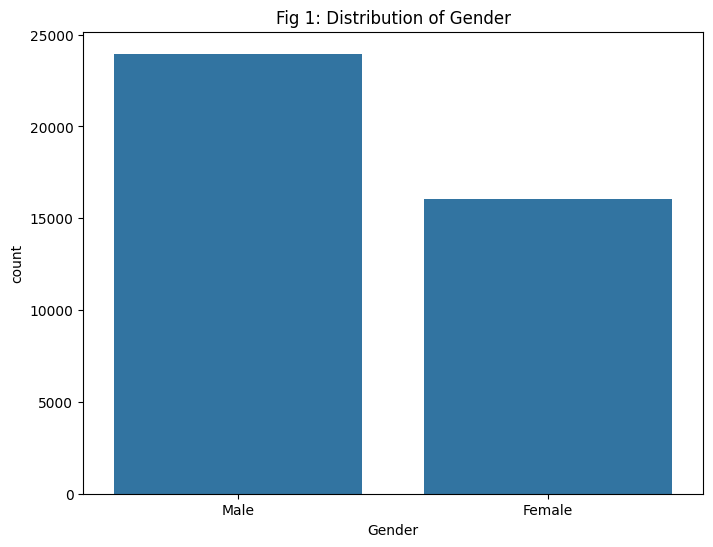

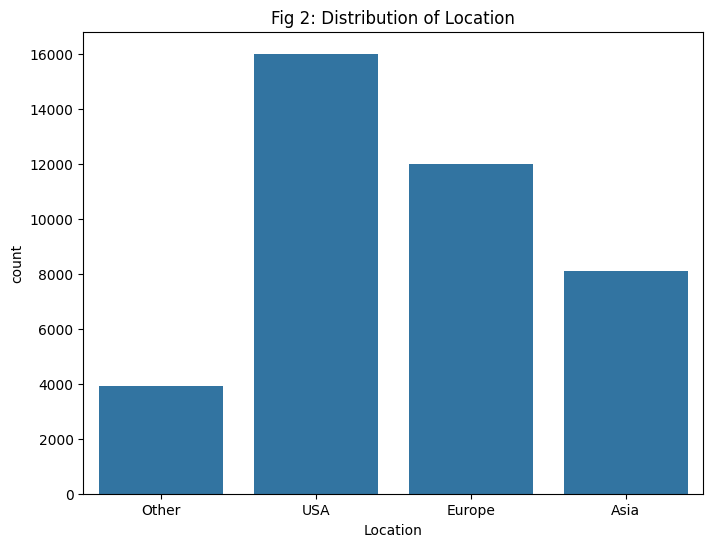

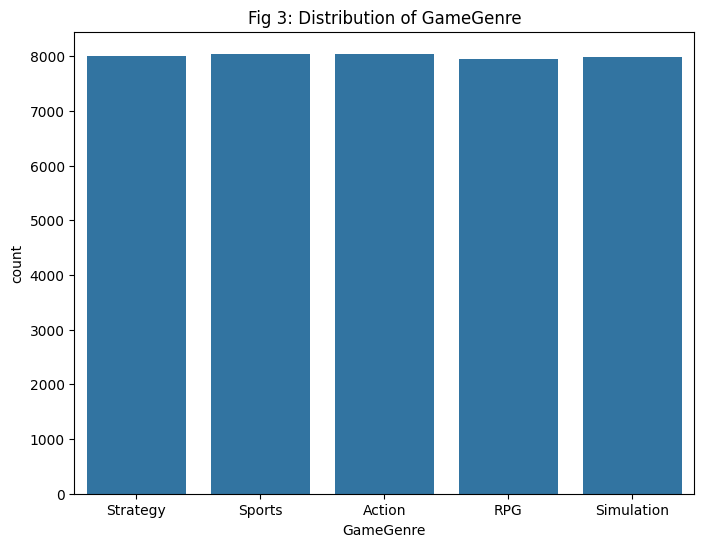

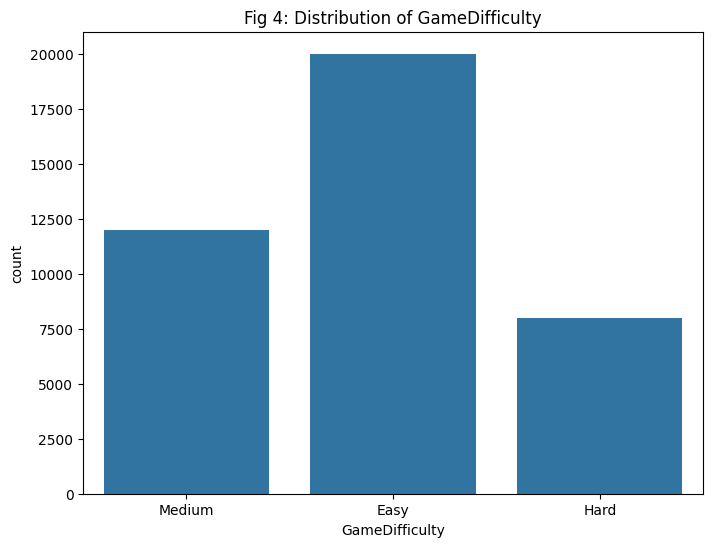

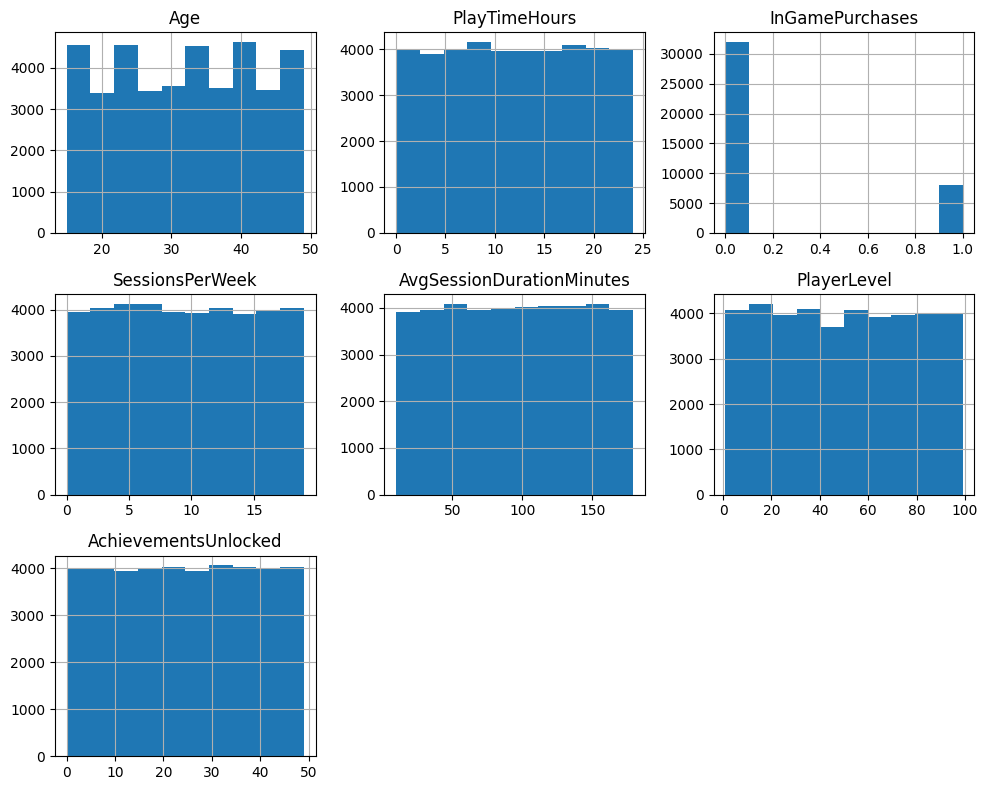

In [ ]:
# Step 6: Data Visualization (Exploratory Data Analysis)

# This ensures we use the actual category names for visualization
original_df_for_plotting = pd.read_csv('online_gaming_behavior_dataset.csv')

# Visualize distribution of categorical features
categorical_features_original = original_df_for_plotting.select_dtypes(include='object').columns.tolist()
# Exclude the target variable 'EngagementLevel' and PlayerID which might be encoded later or dropped
categorical_features_for_plotting = [col for col in categorical_features_original if col not in ['EngagementLevel', 'PlayerID']]

# Initialize a figure counter
fig_counter = 1

for col in categorical_features_for_plotting:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=original_df_for_plotting)
    # Add the figure label to the title
    plt.title(f'Fig {fig_counter}: Distribution of {col}')
    plt.show()
    fig_counter += 1 # Increment the counter

numerical_cols_original = original_df_for_plotting.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_plotting = [col for col in numerical_cols_original if col != 'PlayerID']

original_df_for_plotting[numerical_cols_for_plotting].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

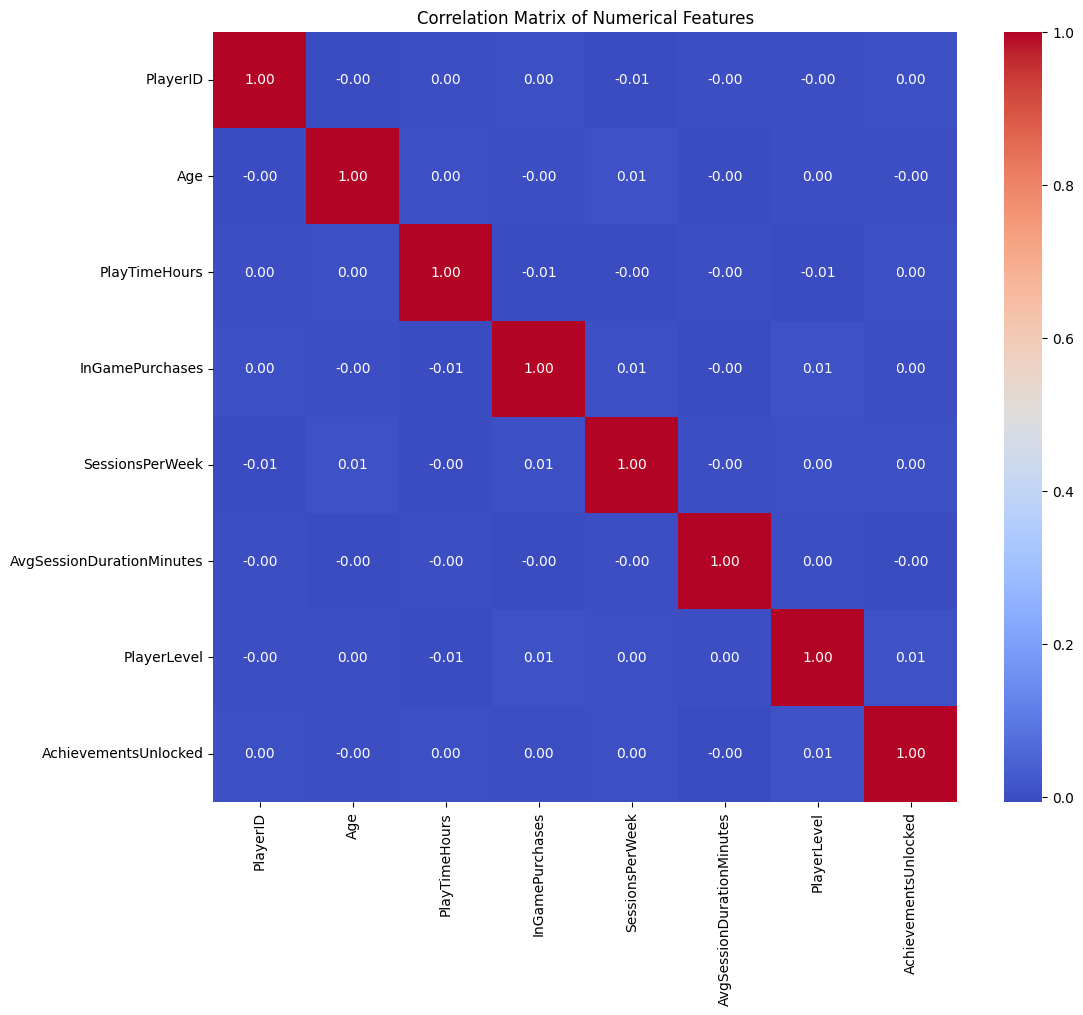

In [ ]:
# Visualize correlation matrix for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

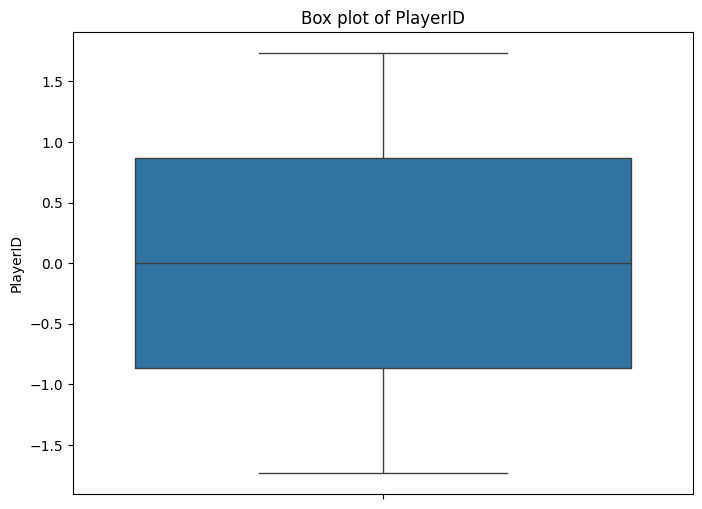

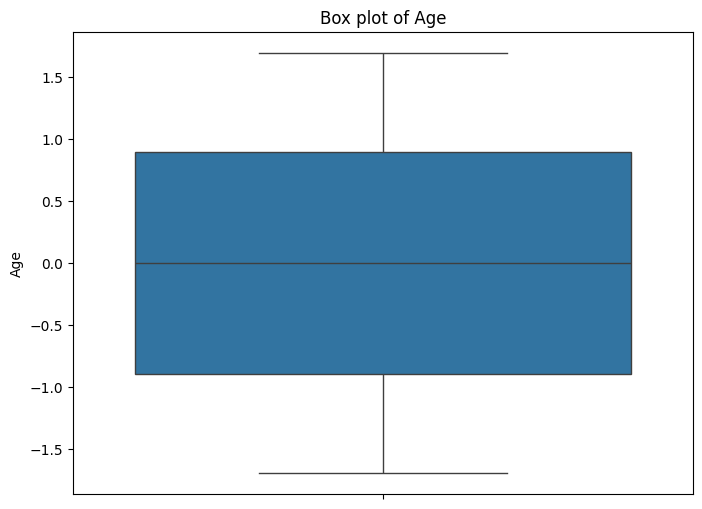

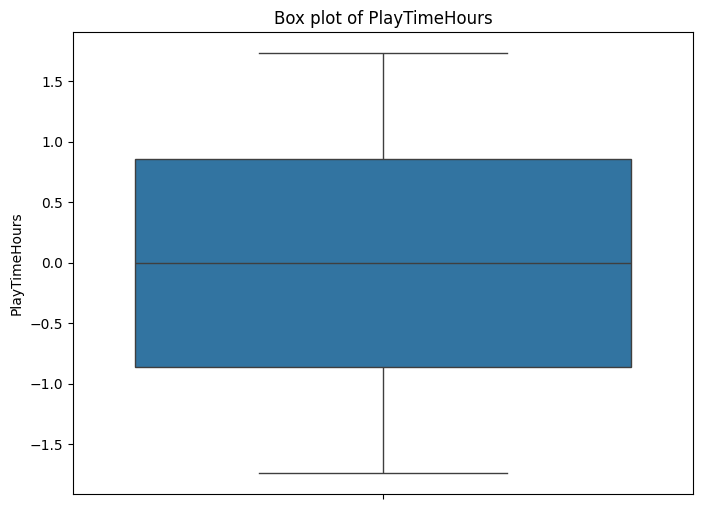

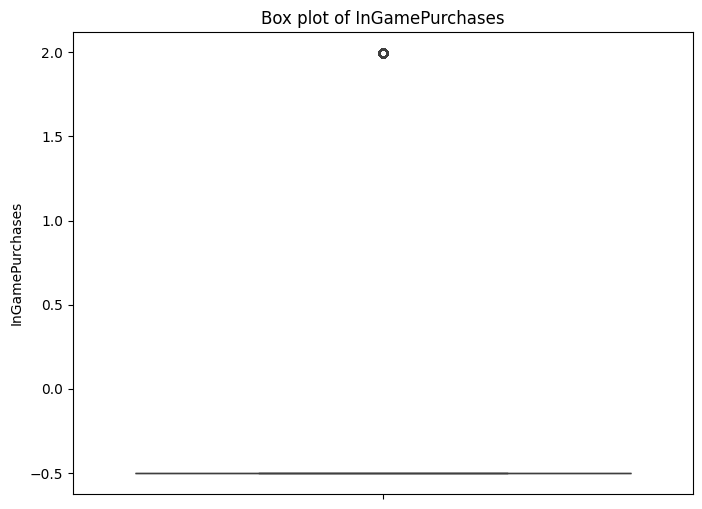

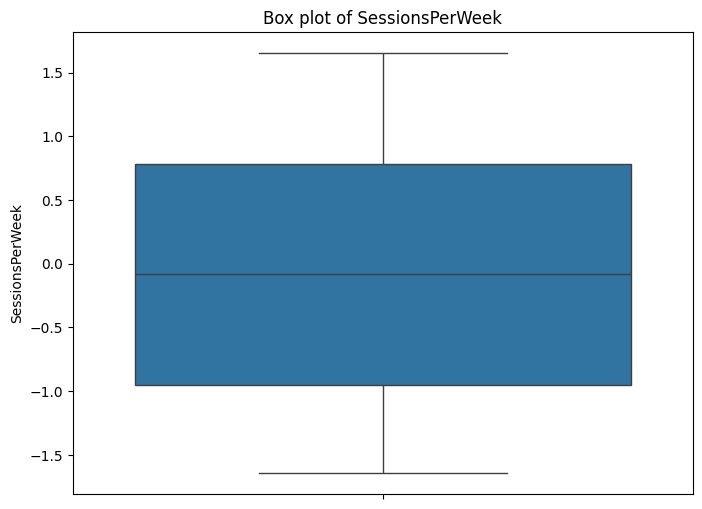

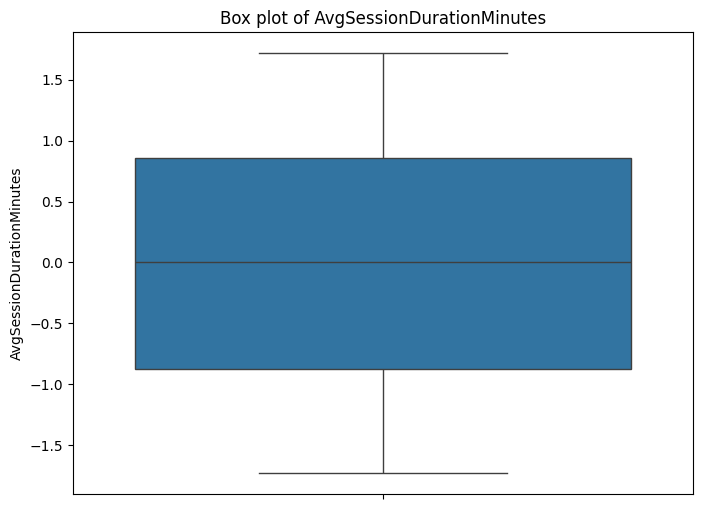

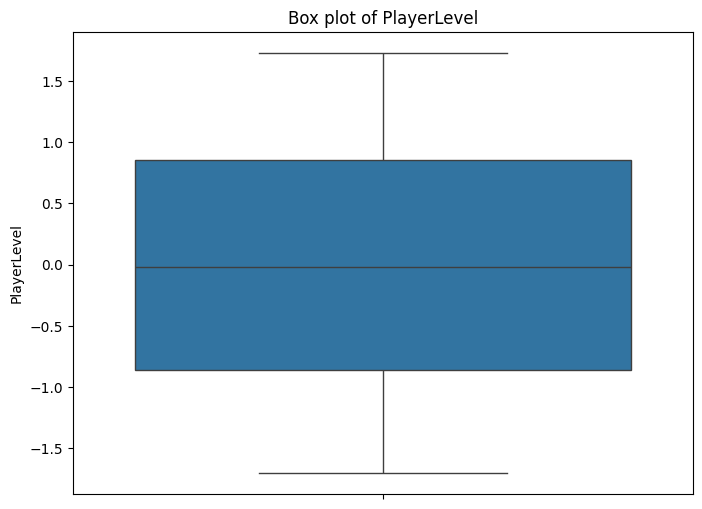

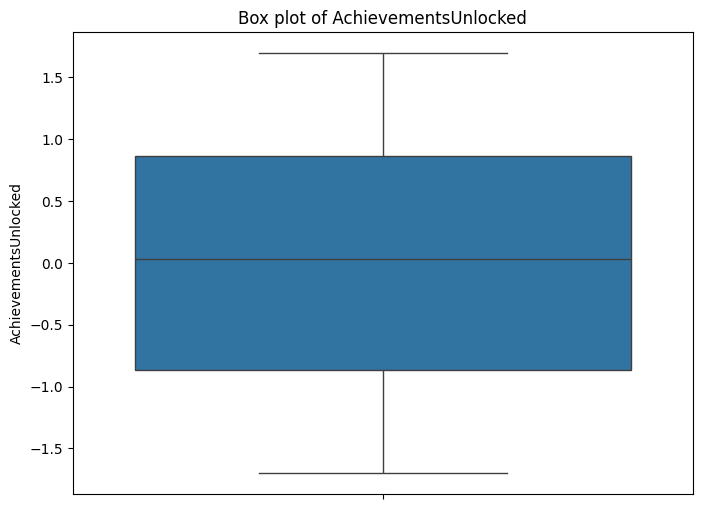

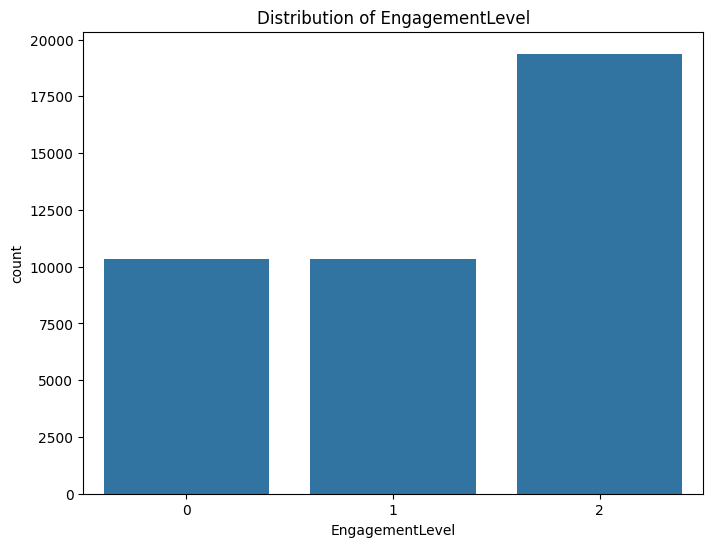

In [ ]:
# Data Visualization (Univariate Analysis)

# Visualize distributions of numerical features with box plots to check for outliers
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='EngagementLevel', data=df)
plt.title('Distribution of EngagementLevel')
plt.show()

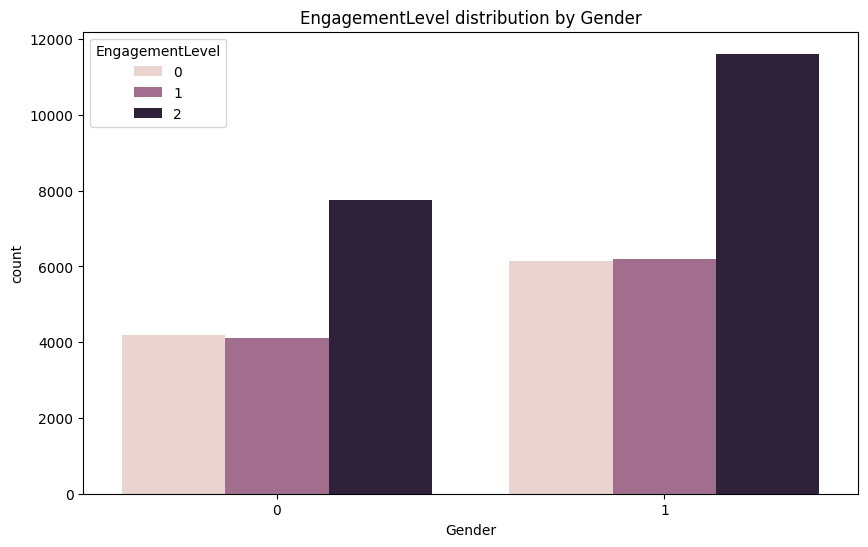

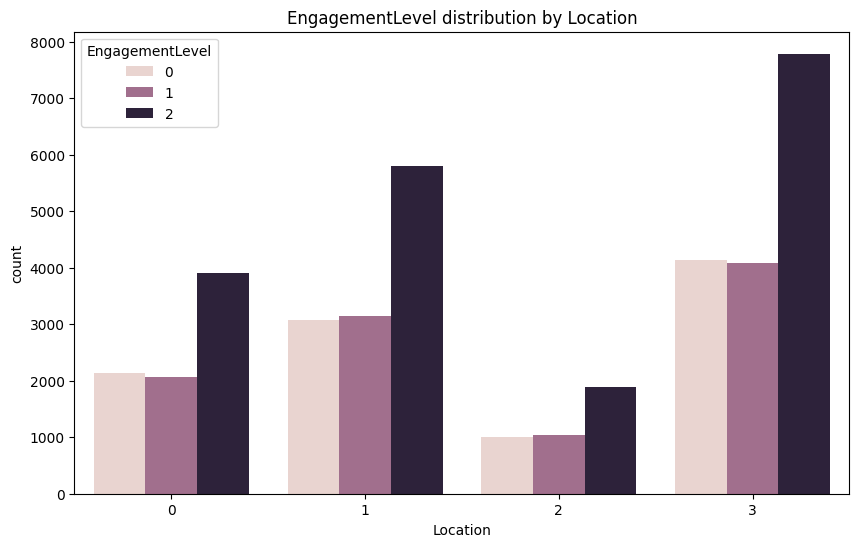

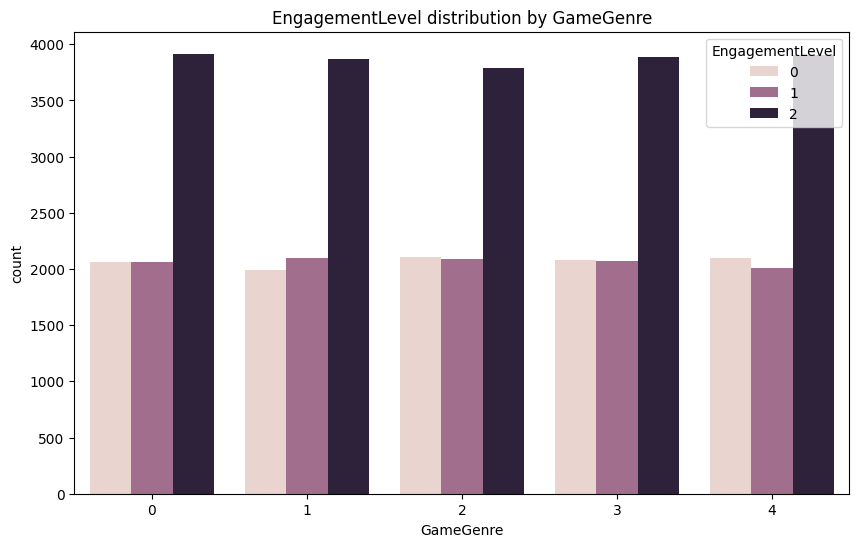

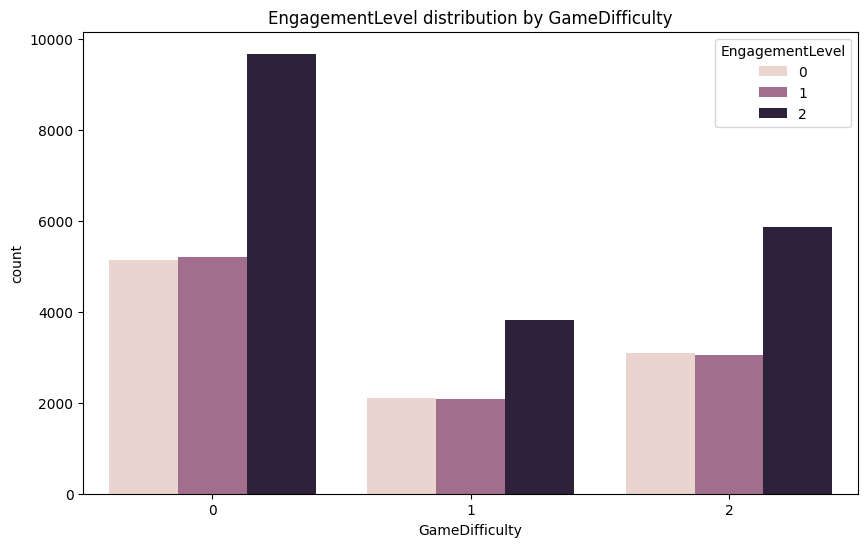

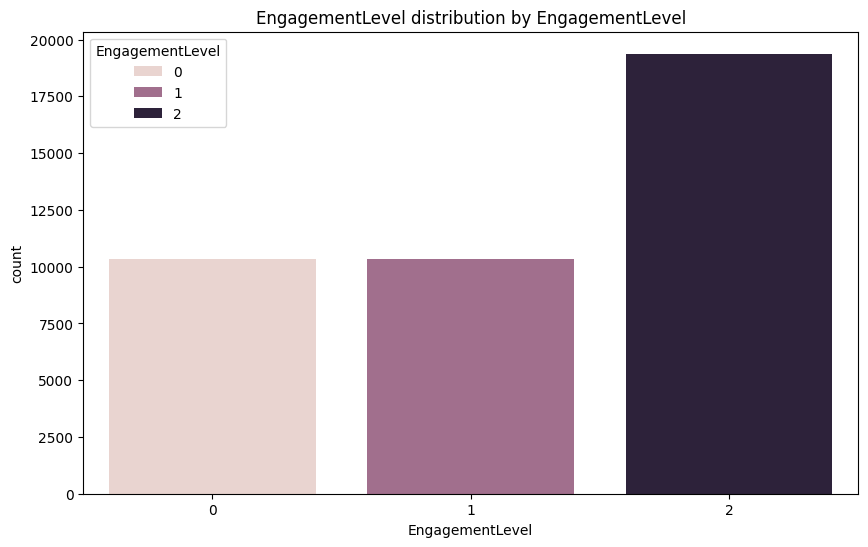

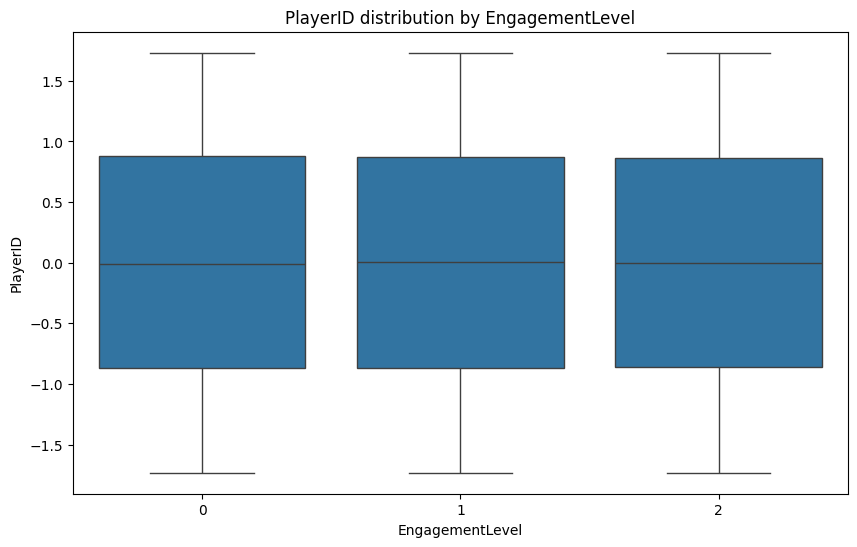

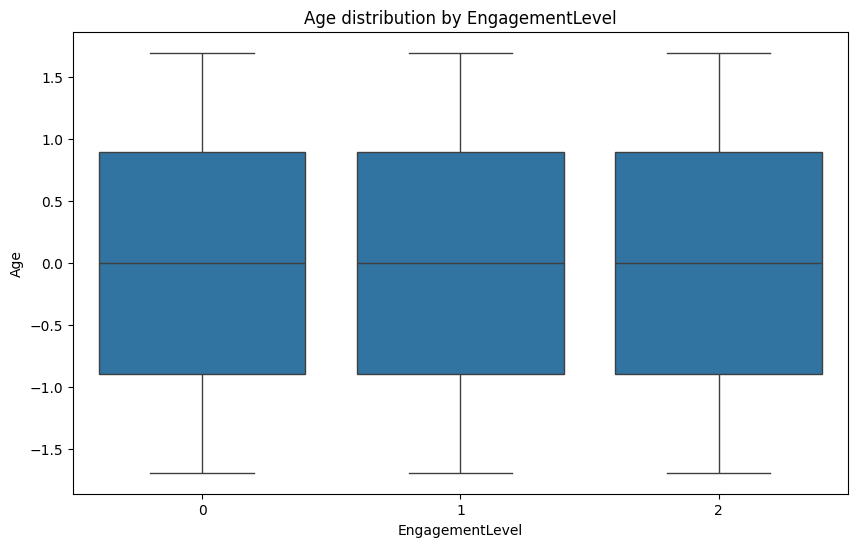

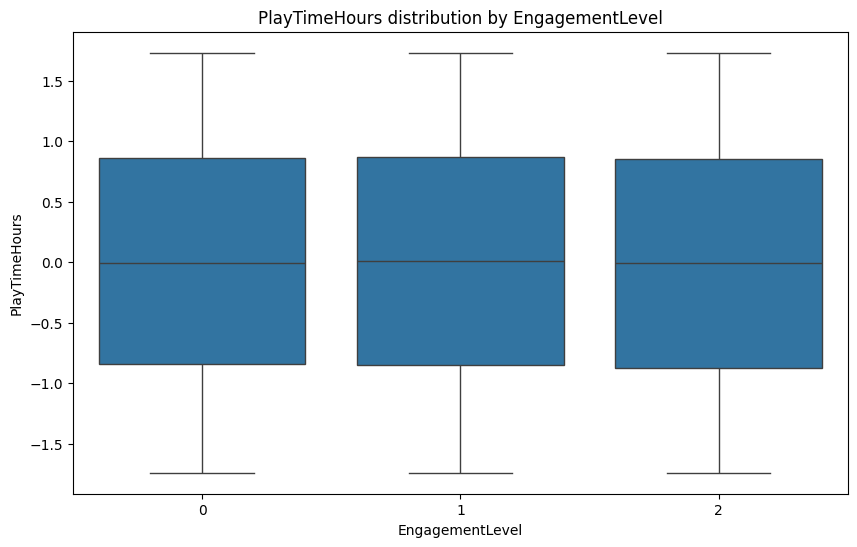

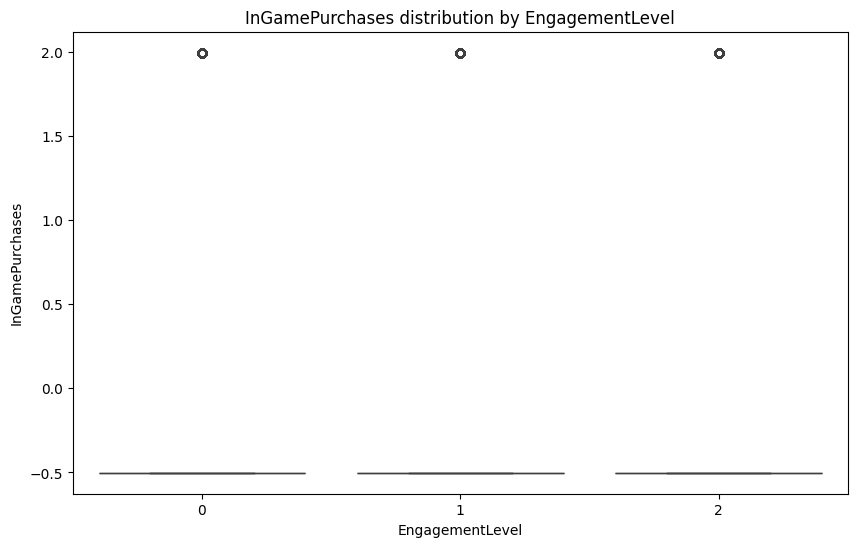

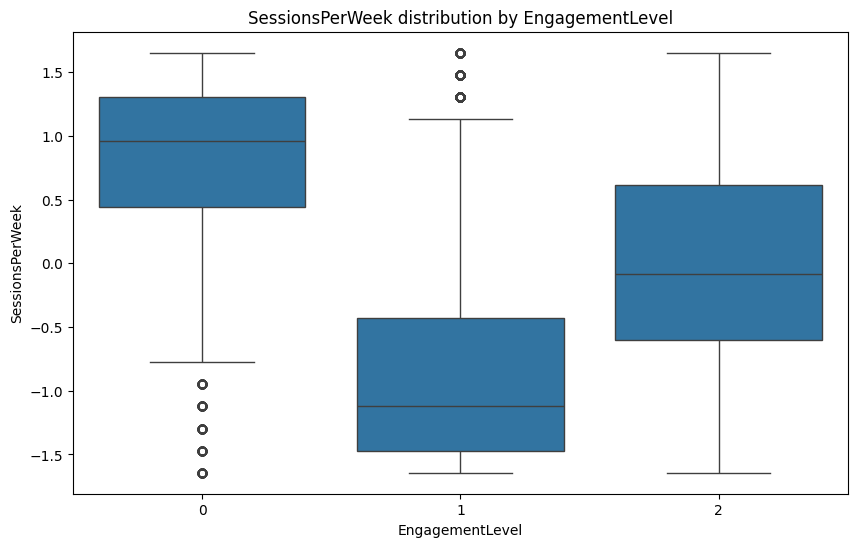

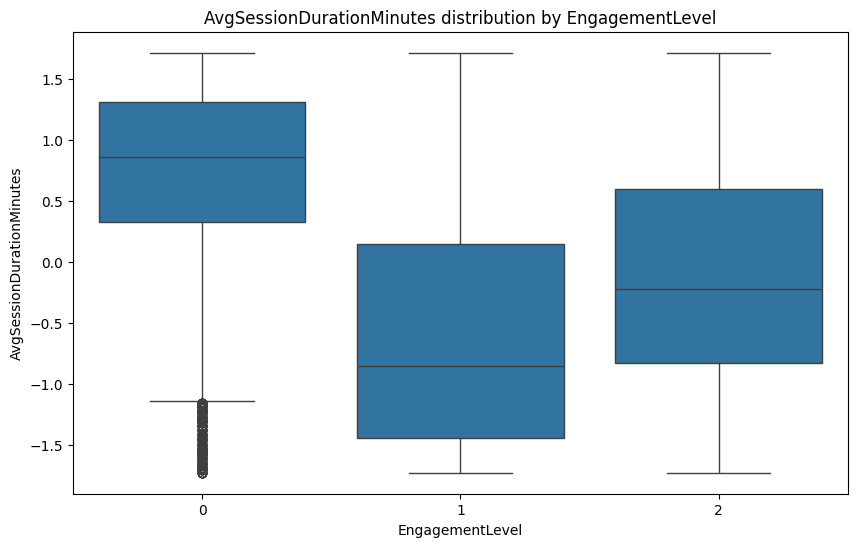

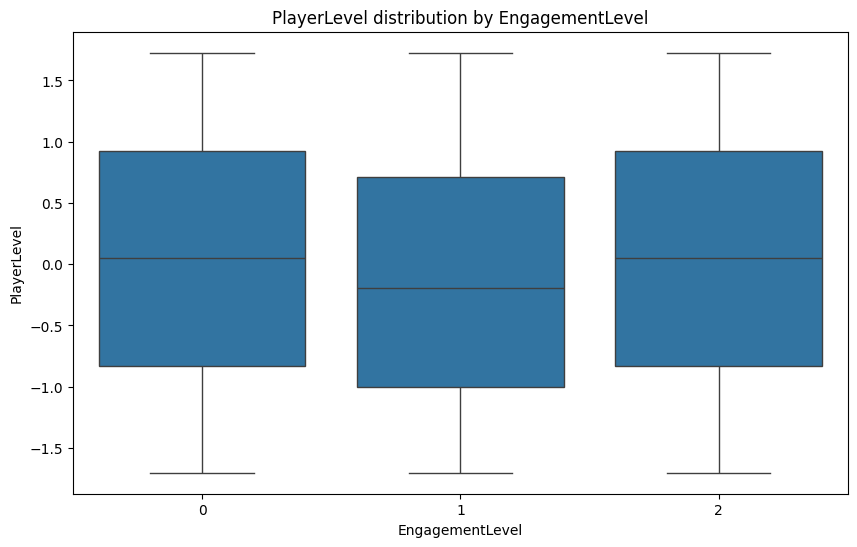

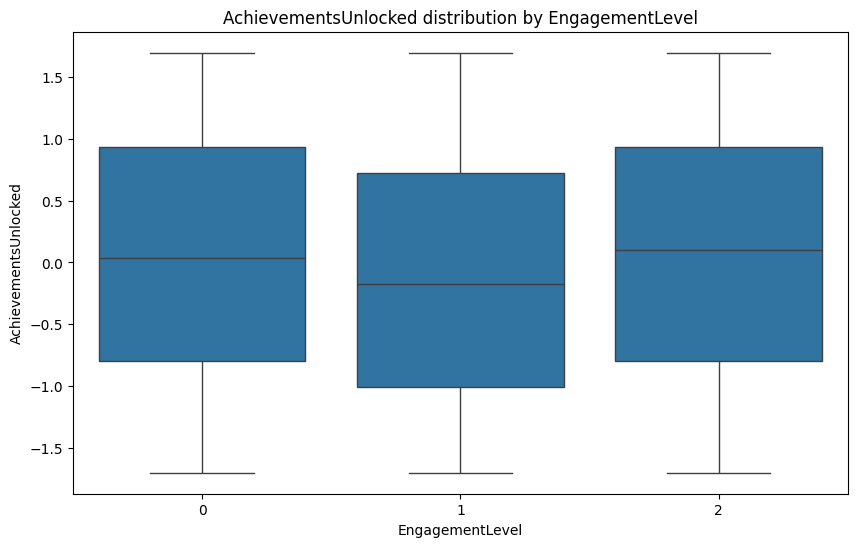

In [ ]:
# Create 'Churn' and 'Low_Engagement_Risk' columns
df['Churn'] = (df['SessionsPerWeek'] < 8).astype(int)
df['Low_Engagement_Risk'] = (df['EngagementLevel'] == 1).astype(int)

# Visualize the relationship between categorical features and EngagementLevel
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='EngagementLevel', data=df)
    plt.title(f'EngagementLevel distribution by {col}')
    plt.show()

# Visualize the relationship between numerical features and EngagementLevel (using box plots)
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='EngagementLevel', y=col, data=df)
    plt.title(f'{col} distribution by EngagementLevel')
    plt.show()

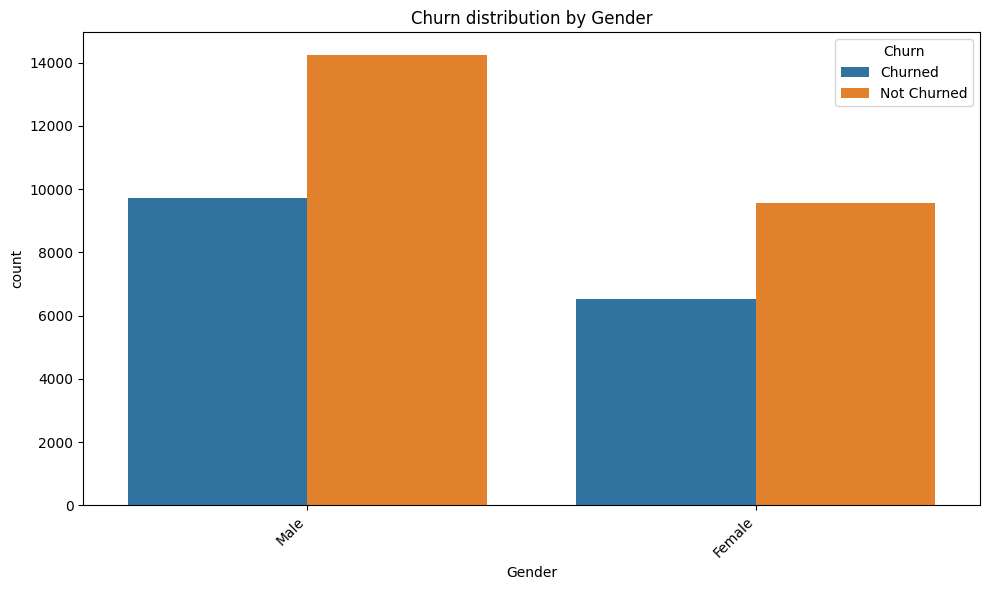

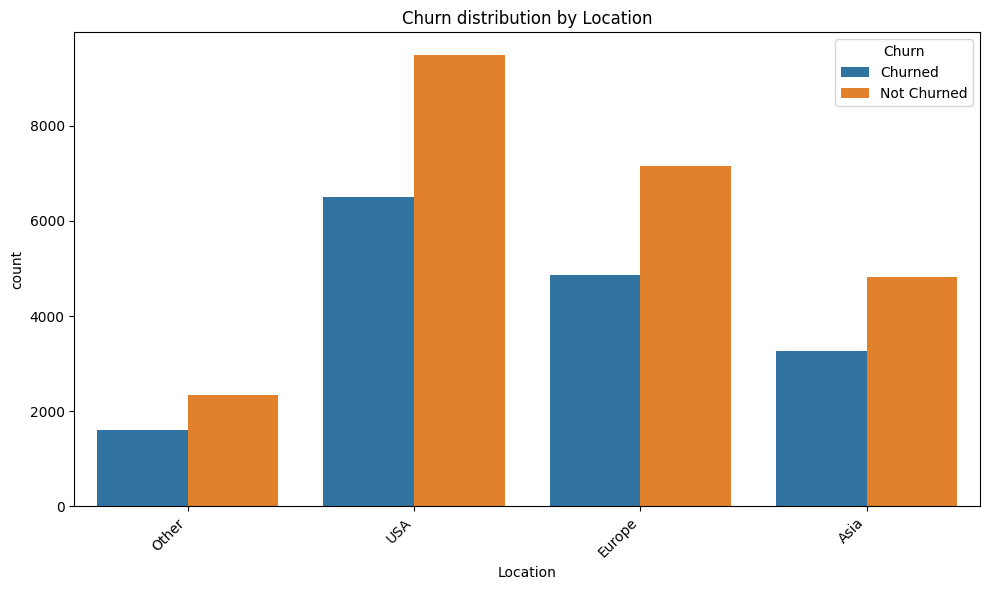

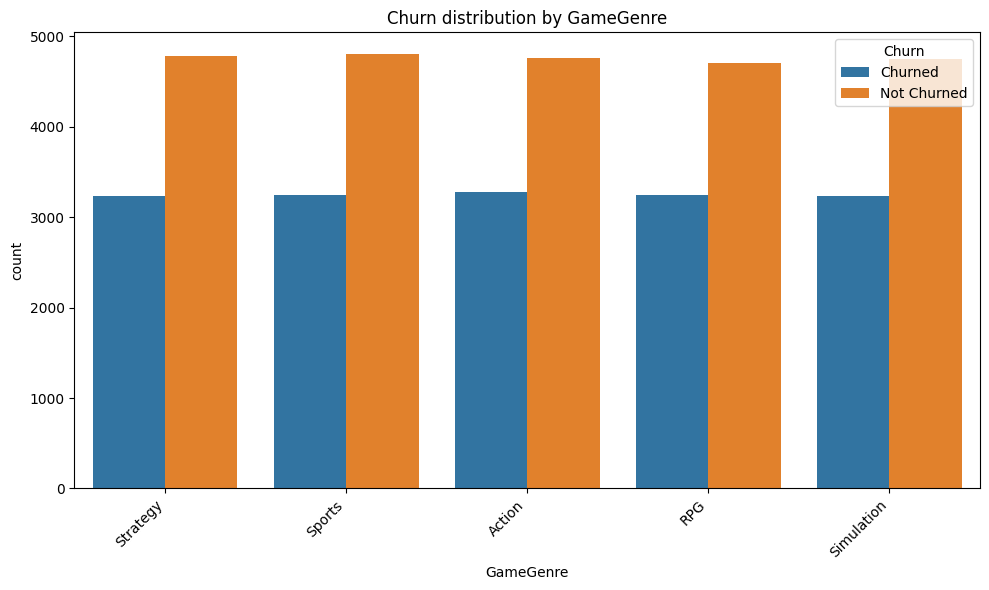

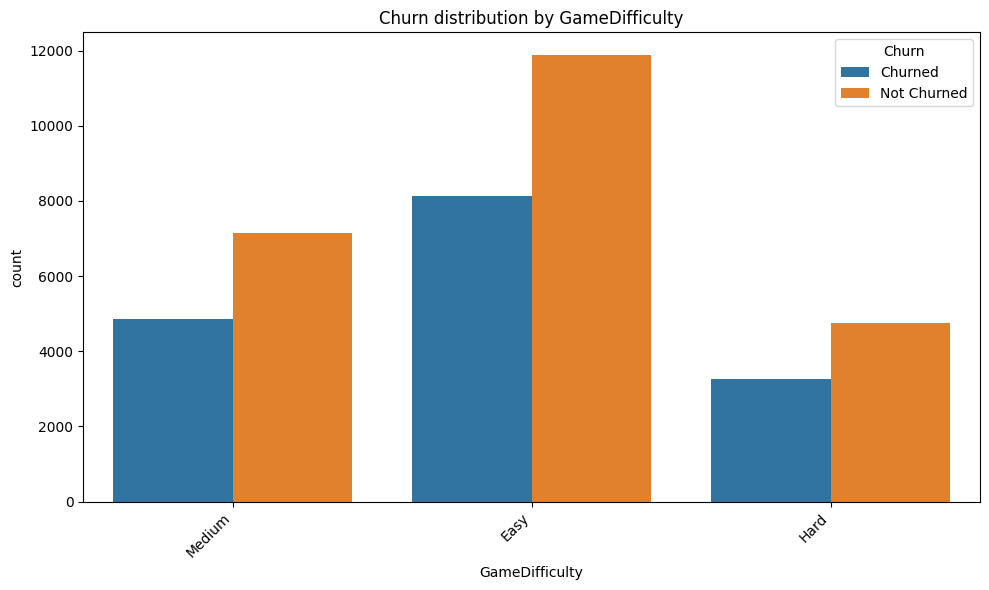

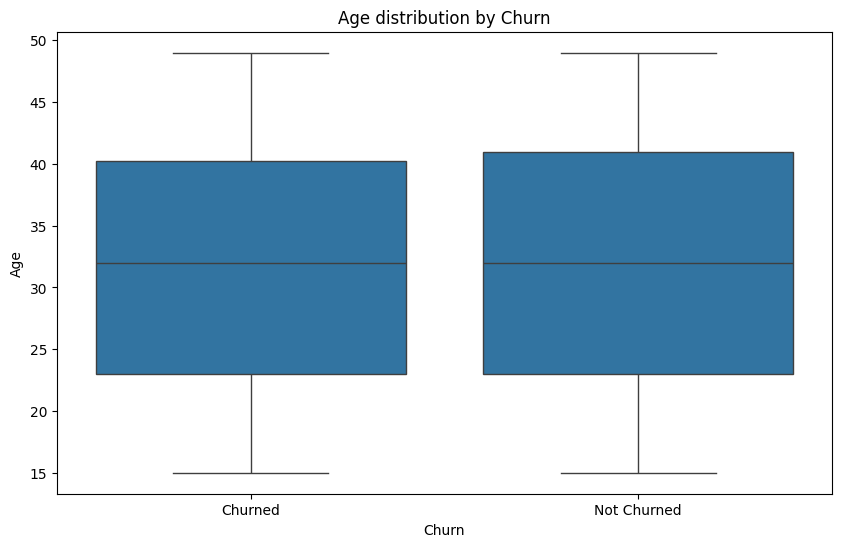

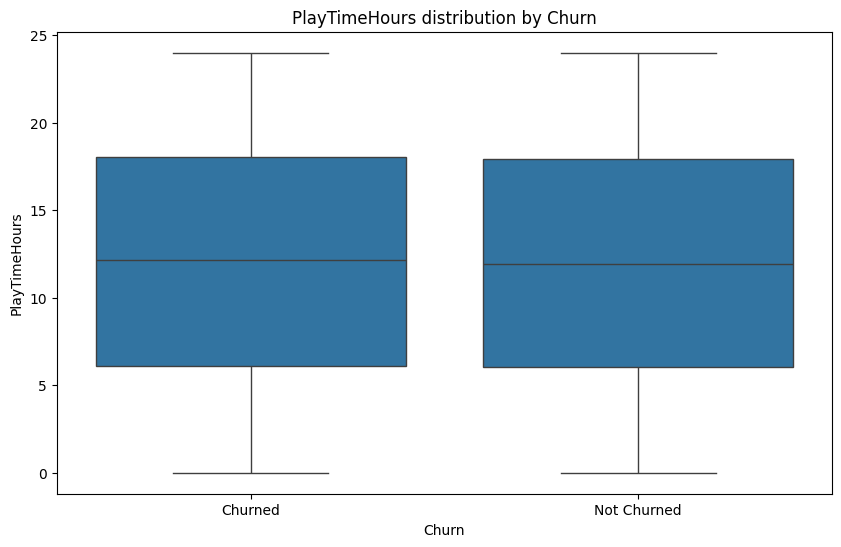

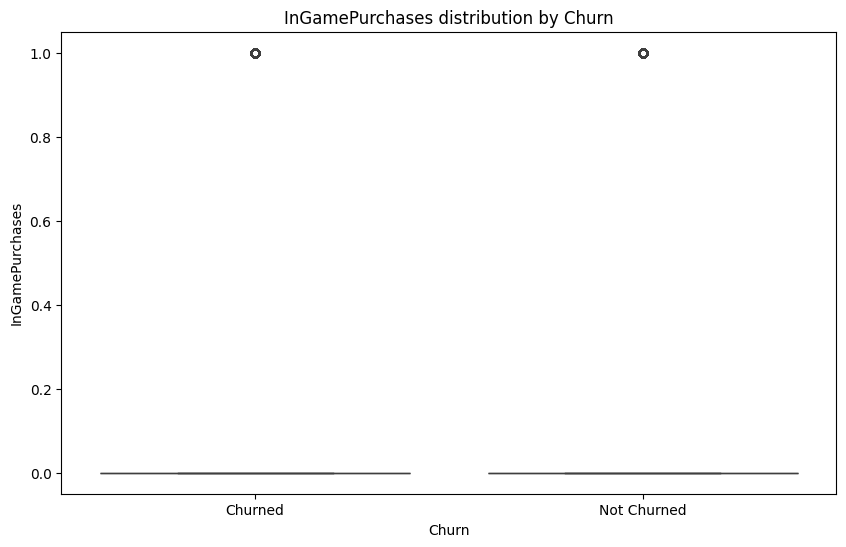

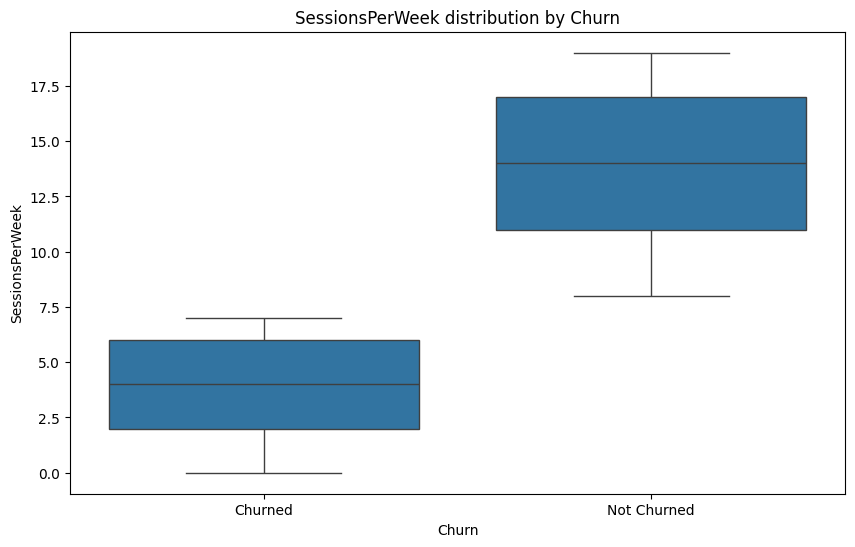

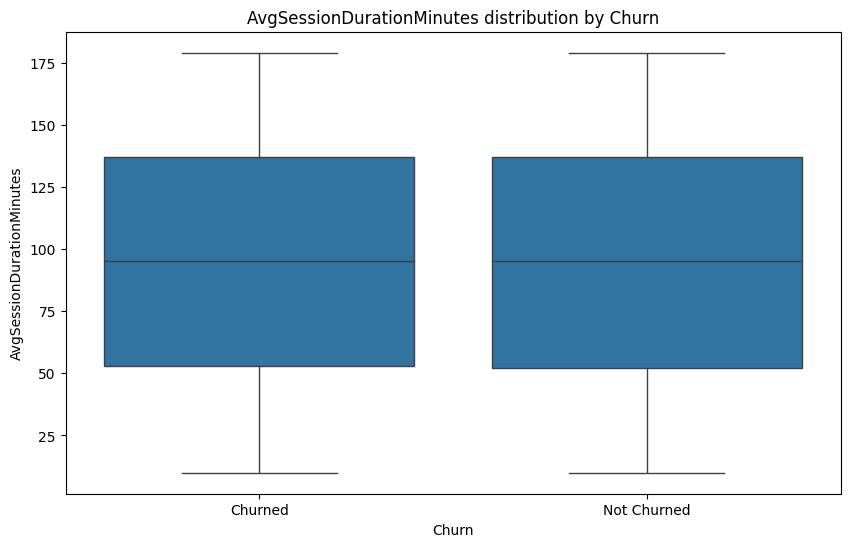

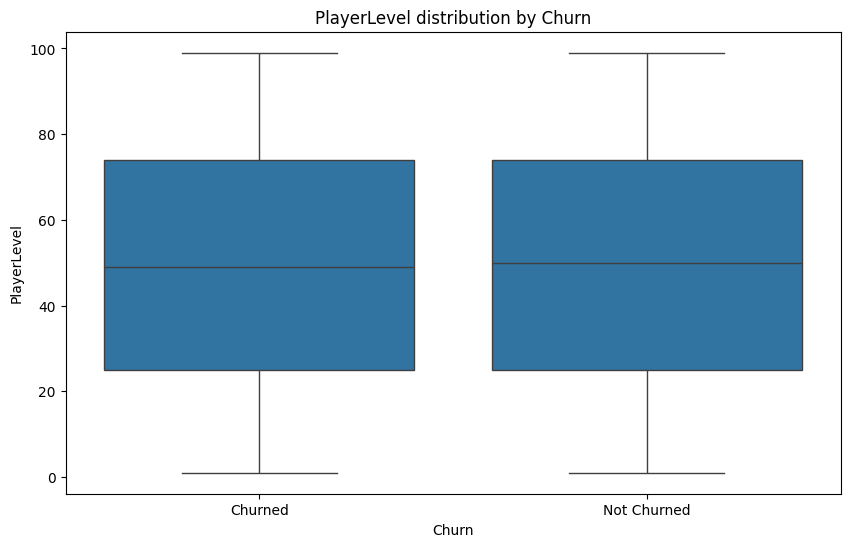

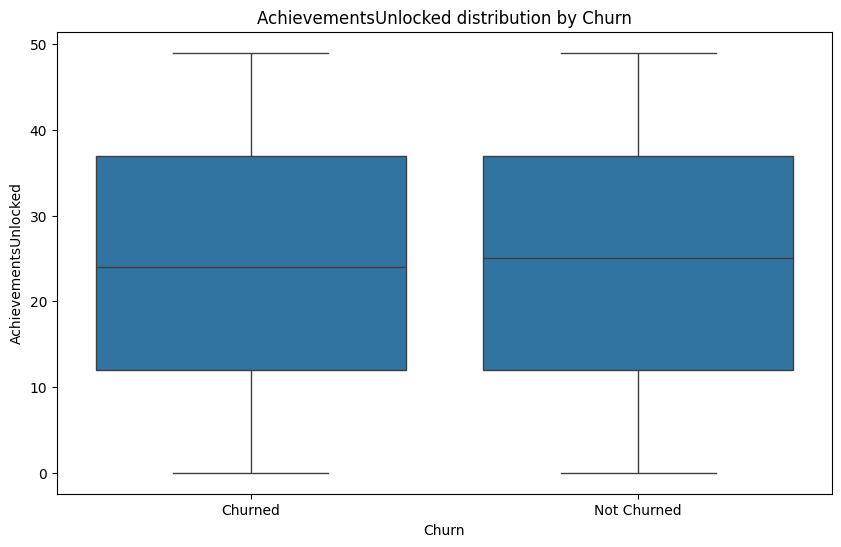

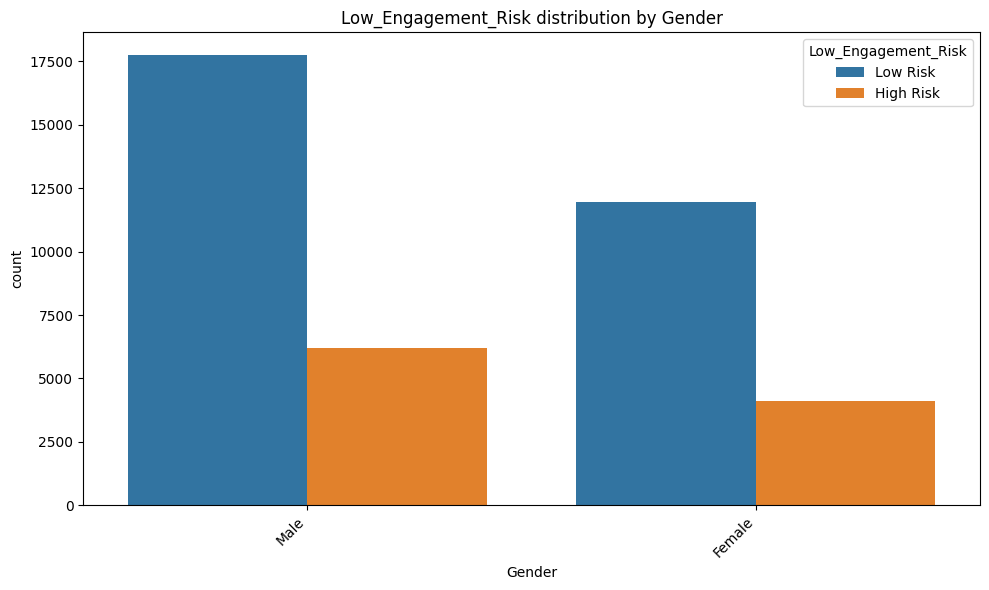

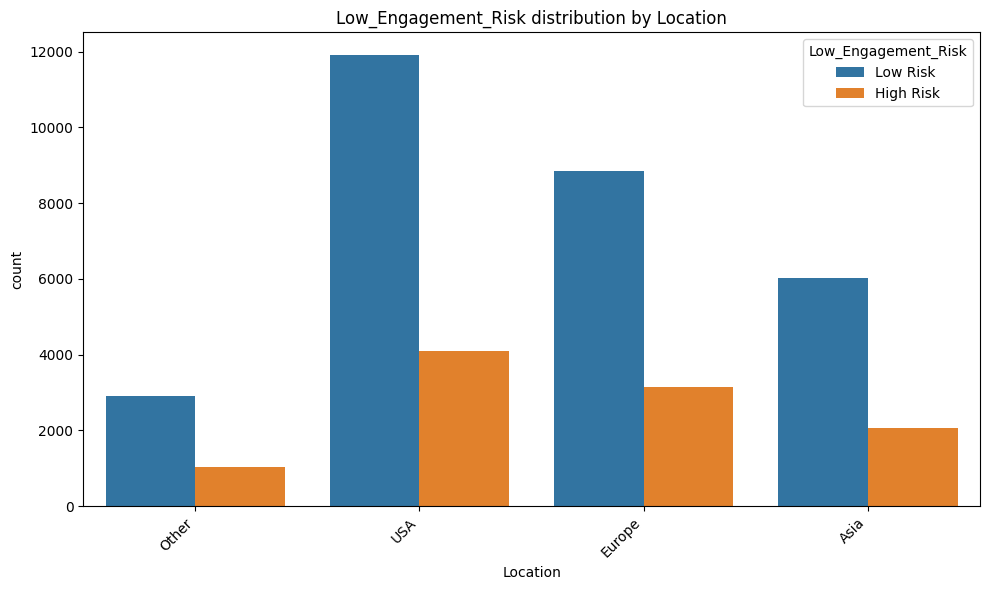

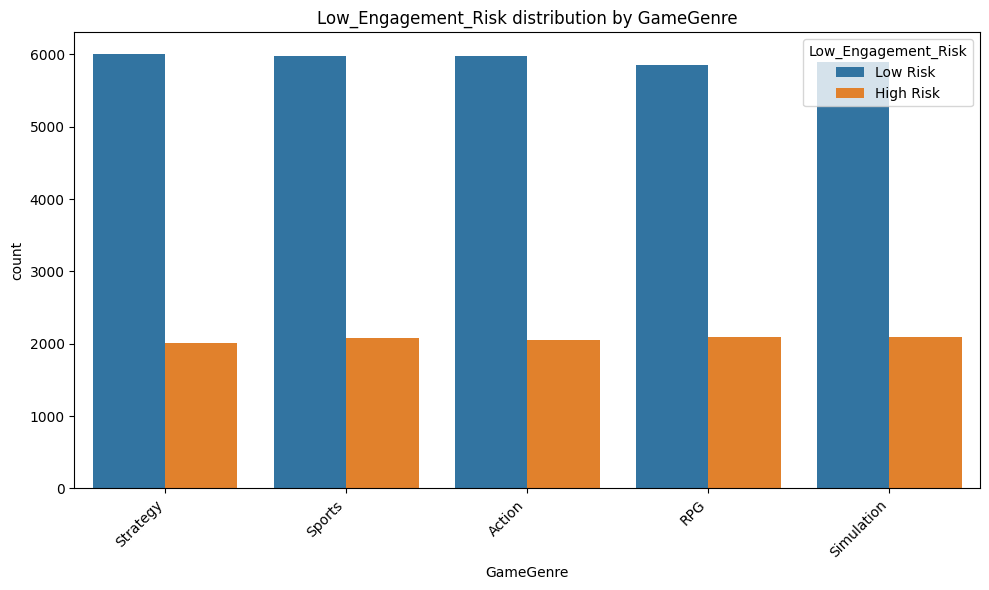

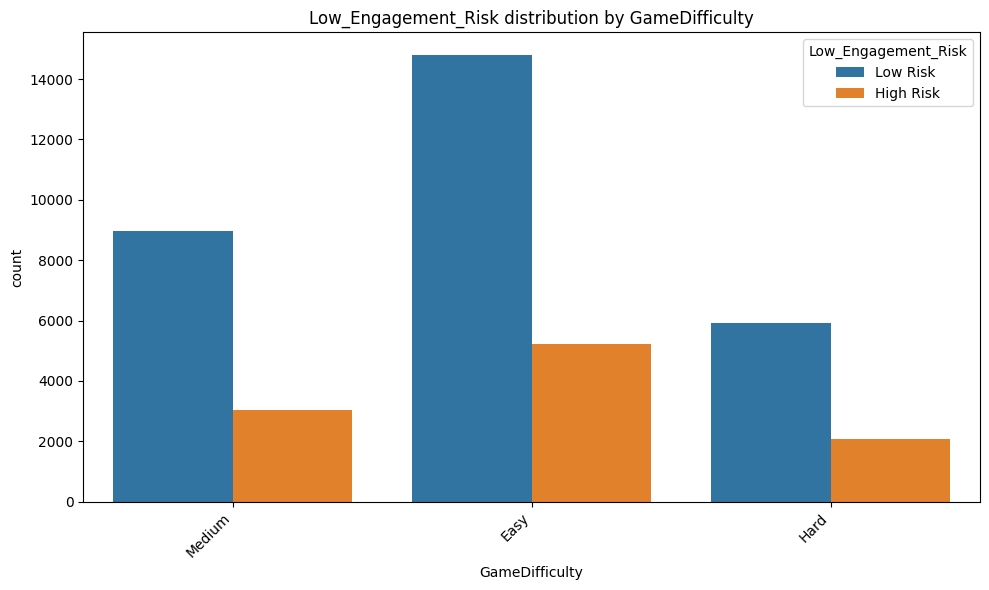

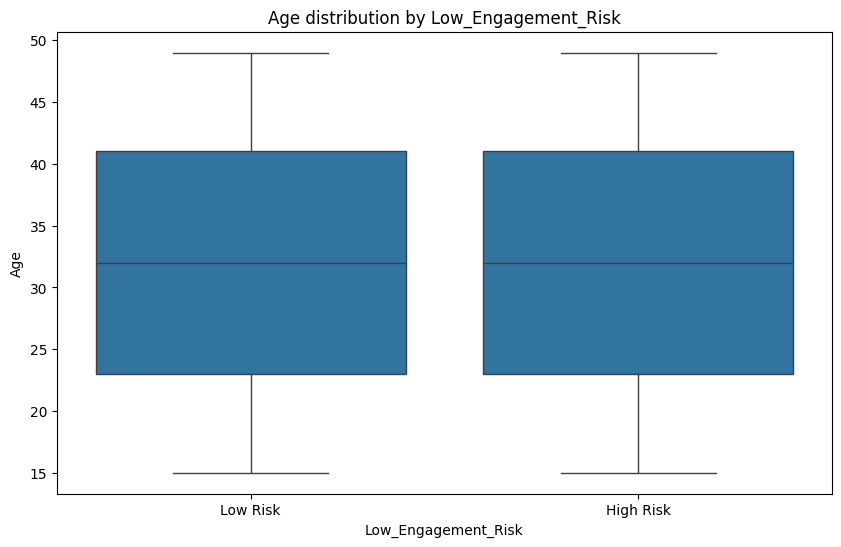

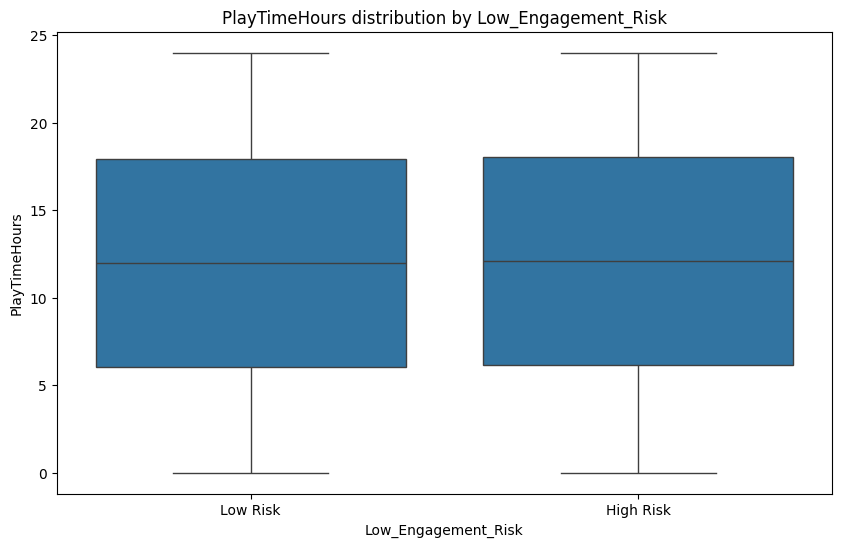

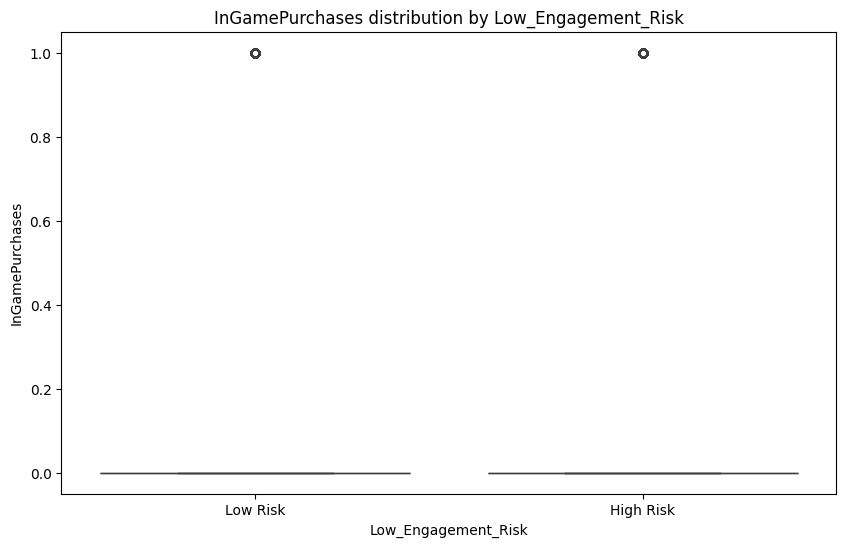

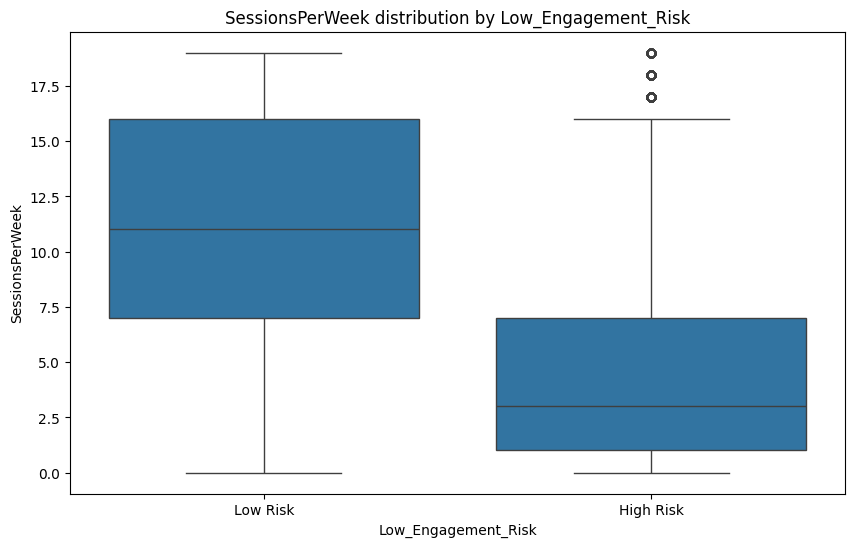

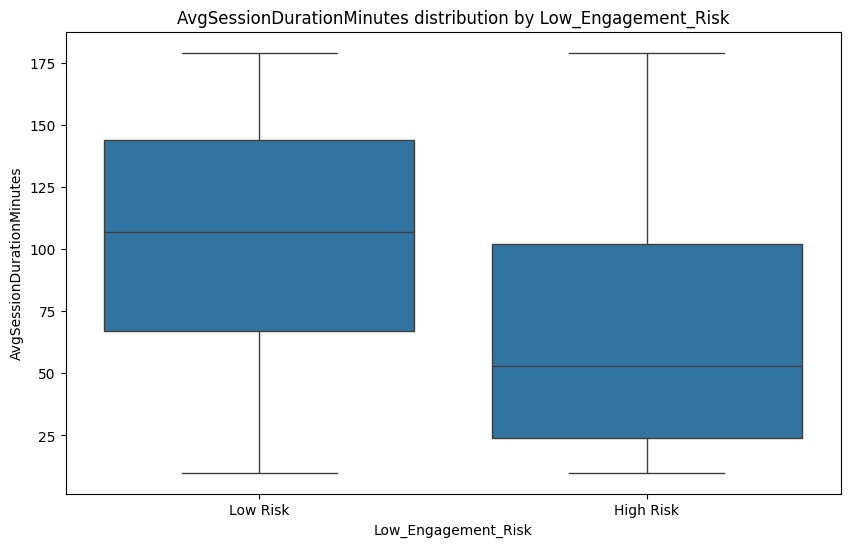

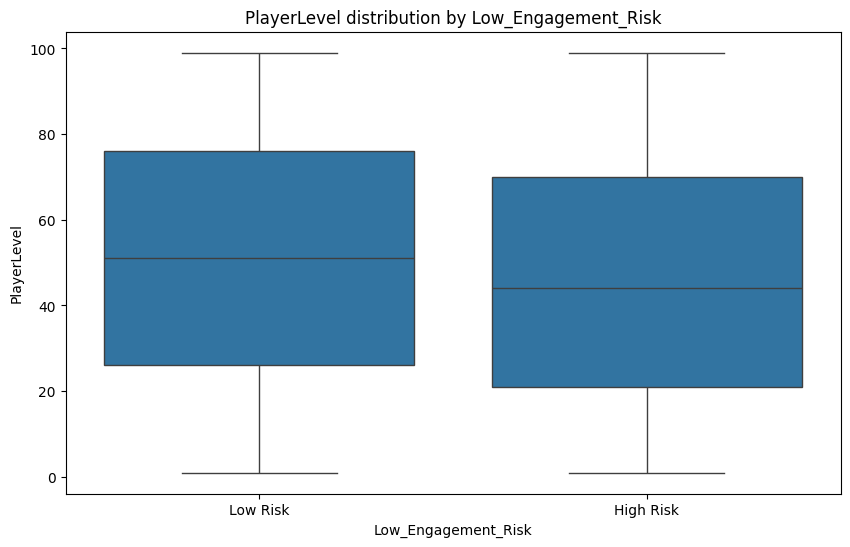

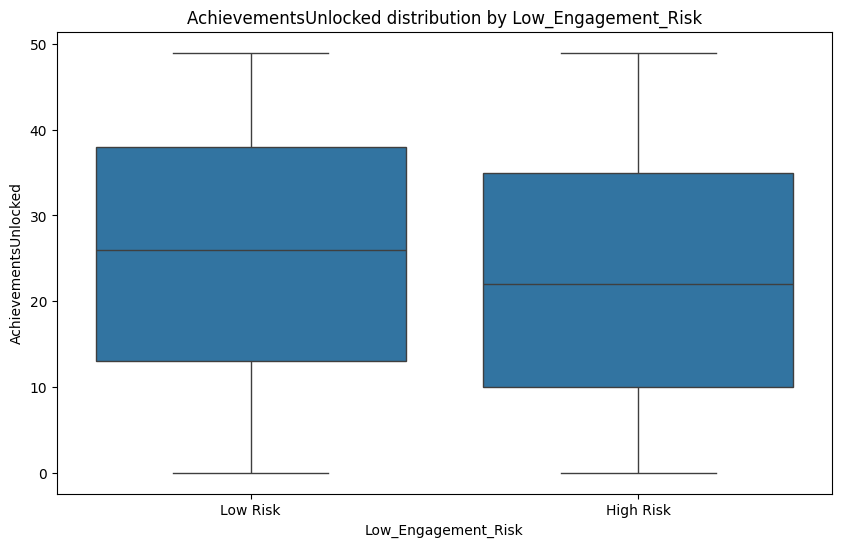

In [ ]:
# To ensures we use the actual category names for visualization
original_df_for_plotting = pd.read_csv('online_gaming_behavior_dataset.csv')
original_df_for_plotting['Churn'] = np.where(original_df_for_plotting['SessionsPerWeek'] < 8, 'Churned', 'Not Churned')
original_df_for_plotting['Low_Engagement_Risk'] = np.where(original_df_for_plotting['EngagementLevel'] == 'Low', 'High Risk', 'Low Risk')


# Identify categorical and numerical columns from the original dataset for plotting
cat_cols_original = original_df_for_plotting.select_dtypes(include='object').columns.tolist()
num_cols_original = original_df_for_plotting.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variables themselves and PlayerID from the features for plotting
cat_cols_for_plotting = [col for col in cat_cols_original if col not in ['EngagementLevel', 'Churn', 'Low_Engagement_Risk', 'PlayerID']]
num_cols_for_plotting = [col for col in num_cols_original if col not in ['PlayerID']]


# Visualize the relationship between categorical features and Churn
for col in cat_cols_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=original_df_for_plotting)
    plt.title(f'Churn distribution by {col}')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout
    plt.show()

# Visualize the relationship between numerical features and Churn (using box plots)
for col in num_cols_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=col, data=original_df_for_plotting)
    plt.title(f'{col} distribution by Churn')
    plt.show()

# Data Visualization (Bivariate Analysis with Low_Engagement_Risk)

# Visualize the relationship between categorical features and Low_Engagement_Risk
for col in cat_cols_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Low_Engagement_Risk', data=original_df_for_plotting)
    plt.title(f'Low_Engagement_Risk distribution by {col}')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout
    plt.show()

# Visualize the relationship between numerical features and Low_Engagement_Risk (using box plots)
for col in num_cols_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Low_Engagement_Risk', y=col, data=original_df_for_plotting)
    plt.title(f'{col} distribution by Low_Engagement_Risk')
    plt.show()

### **Player Churn Prediction (Model 1): Based on Engagement Level**

### Ensure EngagementLevel is string and label churn

In [ ]:
# Create the 'Churn' column by copying 'EngagementLevel'
df['Churn'] = df['EngagementLevel']

# Print the updated class balance to see the distribution across the three levels
print("class distribution (Medium, High, Low):")
print(df['Churn'].value_counts())

class distribution (Medium, High, Low):
Churn
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


In [ ]:
# Drop rows with missing values in important columns
required_columns = [
    'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayTimeHours',
    'InGamePurchases', 'PlayerLevel', 'AchievementsUnlocked',
    'Age', 'Gender', 'Location', 'Churn'
]
df = df.dropna(subset=required_columns)

## Set Up Features & Preprocessing

In [ ]:
# Print original class balance
print("Original class distribution:")
print(df['Churn'].value_counts())

Original class distribution:
Churn
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


In [ ]:
# Define features and target
features = [
    'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayTimeHours',
    'InGamePurchases', 'PlayerLevel', 'AchievementsUnlocked',
    'Age', 'Gender', 'Location'
]
target = 'Churn'

X = df[features]
y = df[target]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Define preprocessing for categorical variables
categorical_features = ['Gender', 'Location']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
# Build pipeline with SMOTE inside
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

In [ ]:
# Train model with balanced data inside pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Location'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Calculate multi-class ROC-AUC
print(f"ROC-AUC Score (OvR): {roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr'):.3f}")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2067
           1       0.91      0.89      0.90      2065
           2       0.91      0.94      0.92      3875

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007

ROC-AUC Score (OvR): 0.943


In [ ]:

# Add churn probabilities to your test set
X_test_copy = X_test.copy()
X_test_copy['Churn_Prob'] = y_prob
X_test_copy['Actual_Churn'] = y_test
X_test_copy['PlayerID'] = df.loc[X_test_copy.index, 'PlayerID'].values

# Classify churn risk level
def risk_level(prob):
    if prob >= 0.8:
        return 'High Risk'
    elif prob >= 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

X_test_copy['Risk_Level'] = X_test_copy['Churn_Prob'].apply(risk_level)

# Summary Table
summary = X_test_copy.groupby('Risk_Level').agg({
    'PlayerID': 'count',
    'Churn_Prob': 'mean',
    'Actual_Churn': 'mean'
}).rename(columns={
    'PlayerID': 'Num_Players',
    'Churn_Prob': 'Avg_Churn_Prob',
    'Actual_Churn': 'Observed_Churn_Rate'
}).sort_values('Avg_Churn_Prob', ascending=False)

print("=== Churn Risk Summary ===")
print(summary)

# Plot risk distribution
fig = px.histogram(X_test_copy, x='Churn_Prob', nbins=50, color='Risk_Level',
                   title="Churn Probability Distribution",
                   labels={'Churn_Prob': 'Predicted Churn Probability'})
fig.show()

=== Churn Risk Summary ===
             Num_Players  Avg_Churn_Prob  Observed_Churn_Rate
Risk_Level                                                   
High Risk           1646        0.932122             0.991495
Medium Risk          353        0.660725             1.138810
Low Risk            6008        0.057631             1.295107


In [ ]:
X_test_copy[['PlayerID', 'Churn_Prob', 'Risk_Level', 'SessionsPerWeek',
             'PlayerLevel', 'InGamePurchases']].to_csv('churn_risk_report.csv', index=False)


In [ ]:
df = pd.read_csv('/content/churn_risk_report.csv')

In [ ]:
# View the first 5 rows
df.head()

,PlayerID,Churn_Prob,Risk_Level,SessionsPerWeek,PlayerLevel,InGamePurchases
0,42212,0.027812,Low Risk,9,53,0
1,41450,0.971301,High Risk,5,58,0
2,34718,0.004143,Low Risk,18,91,0
3,34647,0.041000,Low Risk,11,97,0
4,15697,0.199916,Low Risk,5,34,0


### **Hyperparameter tuning with RandomizedSearchCV**

In [ ]:
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [3, 4, 5, 6, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__gamma': [0, 0.1, 0.2, 0.3],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

## Set up hyperparameter tuning

### Subtask:
Use `RandomizedSearchCV` to perform hyperparameter tuning with cross-validation.


**Reasoning**:
Use RandomizedSearchCV to perform hyperparameter tuning with cross-validation according to the instructions.



In [ ]:


# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='roc_auc_ovr', # Scoring metric
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Gender',
                                                                                'Location'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsam...
                                                            num_parallel_tree=None, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.6,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__gamma': [0, 0.1, 0.2, 0.3],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [3, 4, 5, 6,
                                                                  7],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500],
                                        'classifier__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=42, scoring='roc_auc_ovr')

## Train and evaluate model

### Subtask:
Train the tuned XGBoost model using the best parameters found by `RandomizedSearchCV` and evaluate its performance on the test set.


**Reasoning**:
Extract the best estimator from the fitted RandomizedSearchCV object, make predictions and predict probabilities on the test set, and then print the classification report and ROC-AUC score.



In [ ]:
# Get the best estimator
best_estimator = random_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_estimator.predict(X_test)

# Predict probabilities on the test set
y_prob_tuned = best_estimator.predict_proba(X_test)

# Print the classification report
print("=== Tuned Model Classification Report ===")
print(classification_report(y_test, y_pred_tuned))

# Calculate and print the multi-class ROC-AUC score
print(f"Tuned Model ROC-AUC Score (OvR): {roc_auc_score(y_test, y_prob_tuned, multi_class='ovr'):.3f}")

=== Tuned Model Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2067
           1       0.91      0.89      0.90      2065
           2       0.91      0.94      0.93      3875

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007

Tuned Model ROC-AUC Score (OvR): 0.943


### **Player Churn Prediction (Model 2): Based on Session per week**

### **Load and prepare data**

In [ ]:
# Load dataset
df = pd.read_csv('/content/online_gaming_behavior_dataset.csv')

# Create churn label (example: players with <9 sessions per week = churned)
df['Churn'] = np.where(df['SessionsPerWeek'] < 8, 1, 0)

### **Preprocessing**

In [ ]:
# Drop identifier column if it exists
if 'PlayerID' in df.columns:
    df = df.drop(columns=['PlayerID'])

# Define features and target
X = df.drop('Churn', axis=1)
# Remove 'SessionsPerWeek' from features to avoid data leakage
X = X.drop('SessionsPerWeek', axis=1)
y = df['Churn']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Location', 'GameGenre']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_cols)

## **Create Preprocessing Pipeline**

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


### **Train Model (Random Forest)**

In [ ]:
# Create full pipeline
# Incorporate SMOTE to handle class imbalance
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Add SMOTE here
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['AchievementsUnlocked', 'Age', 'AvgSessionDurationMinutes',
       'InGamePurchases', 'PlayTimeHours', 'PlayerLevel'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Location',
                                                   'GameGenre'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

### **Evaluate Model**

In [ ]:
# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.69      0.64      4759
           1       0.41      0.31      0.35      3248

    accuracy                           0.54      8007
   macro avg       0.50      0.50      0.50      8007
weighted avg       0.52      0.54      0.52      8007

Confusion Matrix:
 [[3303 1456]
 [2249  999]]
ROC AUC Score: 0.49630461003626


### **Plot ROC Curve**

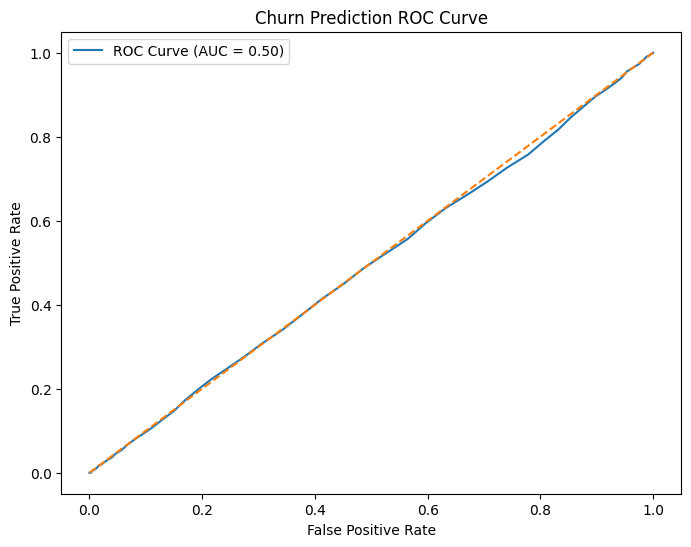

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Churn Prediction ROC Curve')
plt.legend()
plt.show()


### **Feature Importance (from Random Forest)**

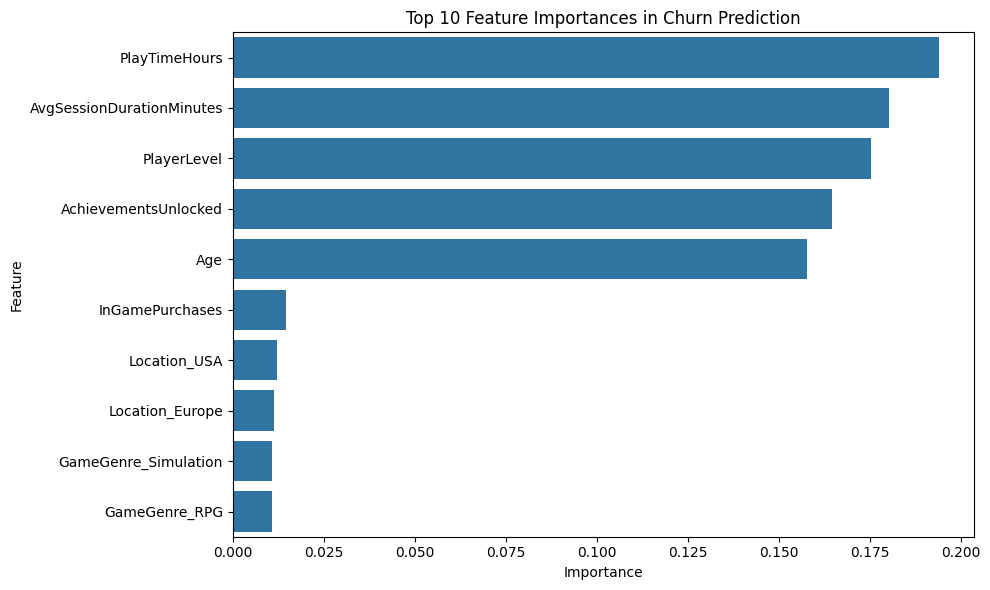

In [ ]:
# Get feature names after transformation
encoder = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)
all_features = np.concatenate([numerical_cols, encoded_cat_cols])

# Get feature importance
importances = model.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances in Churn Prediction')
plt.tight_layout()
plt.show()


In [56]:
# Define parameter distributions for RandomizedSearchCV for Random Forest
param_distributions_rf = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [10, 20, 30, None], # None means nodes are expanded until all leaves are pure
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

## Set up hyperparameter tuning

### Subtask:
Use `RandomizedSearchCV` to perform hyperparameter tuning with cross-validation.


**Reasoning**:
Use RandomizedSearchCV to perform hyperparameter tuning with cross-validation according to the instructions.



In [57]:
# Instantiate RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions_rf,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    scoring='roc_auc', # Scoring metric for binary classification
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['AchievementsUnlocked', 'Age', 'AvgSessionDurationMinutes',
       'InGamePurchases', 'PlayTimeHours', 'PlayerLevel'],
      dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Gender',
                                                                                'Location',
                                                                                'GameGenre'])])),
                                             ('smote', SMOTE...tate=42)),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500]},
                   random_state=42, scoring='roc_auc')

## Train and evaluate tuned model

### Subtask:
Train the Random Forest model using the best parameters found by `RandomizedSearchCV` and evaluate its performance on the test set.


**Reasoning**:
Train the tuned Random Forest model and evaluate its performance on the test set by printing the classification report and ROC-AUC score.



In [58]:
# Get the best estimator
best_estimator_rf = random_search_rf.best_estimator_

# Make predictions on the test set
y_pred_tuned_rf = best_estimator_rf.predict(X_test)

# Predict probabilities on the test set
y_proba_tuned_rf = best_estimator_rf.predict_proba(X_test)[:, 1]

# Print the classification report
print("=== Tuned Random Forest Model Classification Report ===")
print(classification_report(y_test, y_pred_tuned_rf))

# Calculate and print the ROC-AUC score
print(f"Tuned Random Forest Model ROC-AUC Score: {roc_auc_score(y_test, y_proba_tuned_rf):.3f}")

=== Tuned Random Forest Model Classification Report ===
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      4759
           1       0.40      0.42      0.41      3248

    accuracy                           0.51      8007
   macro avg       0.50      0.50      0.50      8007
weighted avg       0.52      0.51      0.51      8007

Tuned Random Forest Model ROC-AUC Score: 0.498


### **Synthetic skill Rating Prediction(Model 3)**
## Create synthetic skill rating target

### Subtask:
Generate a 'SkillRating' column as a weighted combination of 'PlayerLevel', 'AchievementsUnlocked', and 'GameDifficulty'.


**Reasoning**:
Map 'GameDifficulty' to numerical values and create the 'SkillRating' column using a weighted combination of 'PlayerLevel', 'AchievementsUnlocked', and the mapped 'GameDifficulty'.



In [59]:
# Reload the original dataset to access 'GameDifficulty'
df = pd.read_csv('online_gaming_behavior_dataset.csv')

# Step 1: Define a mapping for 'GameDifficulty'
difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['MappedGameDifficulty'] = df['GameDifficulty'].map(difficulty_mapping)

# Step 2: Create the 'SkillRating' column
# Define weights (example weights, can be adjusted)
weight_PlayerLevel = 0.4
weight_AchievementsUnlocked = 0.4
weight_GameDifficulty = 0.2

df['SkillRating'] = (weight_PlayerLevel * df['PlayerLevel']) + \
                    (weight_AchievementsUnlocked * df['AchievementsUnlocked']) + \
                    (weight_GameDifficulty * df['MappedGameDifficulty'])

# Display the first few rows with the new column
display(df[['PlayerLevel', 'AchievementsUnlocked', 'GameDifficulty', 'MappedGameDifficulty', 'SkillRating']].head())

,PlayerLevel,AchievementsUnlocked,GameDifficulty,MappedGameDifficulty,SkillRating
0,79,25,Medium,2,42.0
1,11,10,Medium,2,8.8
2,35,41,Easy,1,30.6
3,57,47,Easy,1,41.8
4,95,37,Medium,2,53.2


## Prepare data for regression

### Subtask:
Select the features identified for this model and the newly created 'SkillRating' target. Split the data into training and testing sets.


**Reasoning**:
Select the features and target variables, then split the data into training and testing sets.



In [60]:
# Define features and target
features = [
    'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
    'PlayerLevel', 'AchievementsUnlocked', 'MappedGameDifficulty',
    'Age', 'Gender'
]
target = 'SkillRating'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32027, 8)
X_test shape: (8007, 8)
y_train shape: (32027,)
y_test shape: (8007,)


## Preprocess features

### Subtask:
Apply necessary preprocessing steps to the features, including encoding categorical variables and scaling numerical features.


**Reasoning**:
Apply necessary preprocessing steps to the features, including encoding categorical variables and scaling numerical features using a ColumnTransformer.



In [61]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create a ColumnTransformer for preprocessing
# Apply OneHotEncoder to categorical features and StandardScaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - not applicable here
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data (do not fit again)
X_test_processed = preprocessor.transform(X_test)

# Print the shapes of the processed data
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

X_train_processed shape: (32027, 9)
X_test_processed shape: (8007, 9)


## Train regression models

### Subtask:
Train one or more regression models (e.g., Linear Regression, Random Forest Regressor, XGBoost Regressor) on the training data.


**Reasoning**:
Instantiate and train the regression models using the preprocessed training data.



In [64]:
# Step 2 & 3: Instantiate and train the regression models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

lr_model.fit(X_train_processed, y_train)
rf_model.fit(X_train_processed, y_train)
xgb_model.fit(X_train_processed, y_train)

print("Linear Regression model trained.")
print("Random Forest Regressor model trained.")
print("XGBoost Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.
XGBoost Regressor model trained.


## Evaluate regression models

### Subtask:
Evaluate the performance of the trained regression models using appropriate metrics for regression tasks (e.g., Mean Absolute Error, Mean Squared Error, R-squared).


**Reasoning**:
Import necessary regression evaluation metrics and then evaluate the performance of each trained model using MAE, MSE, RMSE, and R2 score on the test data, printing the results for each model.



In [65]:
# Evaluate Linear Regression model
y_pred_lr = lr_model.predict(X_test_processed)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_lr:.3f}")
print(f"Mean Squared Error (MSE): {mse_lr:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.3f}")
print(f"R-squared (R2): {r2_lr:.3f}")
print("-" * 40)

# Evaluate Random Forest Regressor model
y_pred_rf = rf_model.predict(X_test_processed)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Regressor Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.3f}")
print(f"R-squared (R2): {r2_rf:.3f}")
print("-" * 40)

# Evaluate XGBoost Regressor model
y_pred_xgb = xgb_model.predict(X_test_processed)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("=== XGBoost Regressor Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_xgb:.3f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.3f}")
print(f"R-squared (R2): {r2_xgb:.3f}")
print("-" * 40)

=== Linear Regression Model Evaluation ===
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
R-squared (R2): 1.000
----------------------------------------
=== Random Forest Regressor Model Evaluation ===
Mean Absolute Error (MAE): 0.105
Mean Squared Error (MSE): 0.019
Root Mean Squared Error (RMSE): 0.136
R-squared (R2): 1.000
----------------------------------------
=== XGBoost Regressor Model Evaluation ===
Mean Absolute Error (MAE): 0.103
Mean Squared Error (MSE): 0.018
Root Mean Squared Error (RMSE): 0.135
R-squared (R2): 1.000
----------------------------------------


# Task
Optimize the previously trained Linear Regression, Random Forest Regressor, and XGBoost Regressor models using hyperparameter tuning.

## Define parameter grids

### Subtask:
Create dictionaries or lists specifying the hyperparameters and their possible values to tune for each model.


In [66]:
# Step 1: Define hyperparameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}

# Step 2: Define hyperparameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 3: Define hyperparameter grid for XGBoost Regressor
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

print("Hyperparameter grids defined:")
print("Linear Regression:", param_grid_lr)
print("Random Forest Regressor:", param_grid_rf)
print("XGBoost Regressor:", param_grid_xgb)

Hyperparameter grids defined:
Linear Regression: {'fit_intercept': [True, False]}
Random Forest Regressor: {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
XGBoost Regressor: {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 1.0]}


## Perform hyperparameter tuning

### Subtask:
Use cross-validation and a search method (like Grid Search or Random Search) to find the best hyperparameters for each model.


In [67]:
# Instantiate and fit GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train_processed, y_train)

# Instantiate and fit GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_processed, y_train)

# Instantiate and fit GridSearchCV for XGBoost Regressor
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='r2')
grid_search_xgb.fit(X_train_processed, y_train)

# Store the best estimators
best_lr_model = grid_search_lr.best_estimator_
best_rf_model = grid_search_rf.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best parameters found by each grid search
print("Best parameters for Linear Regression:", grid_search_lr.best_params_)
print("Best parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best parameters for XGBoost Regressor:", grid_search_xgb.best_params_)

Best parameters for Linear Regression: {'fit_intercept': True}
Best parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


## Evaluate optimized models

### Subtask:
Evaluate the performance of the models with the best hyperparameters on the test set using appropriate regression metrics.


**Reasoning**:
Evaluate the performance of each tuned model on the test set using various regression metrics.



In [68]:
# Use the best models to make predictions on the test set
y_pred_lr_tuned = best_lr_model.predict(X_test_processed)
y_pred_rf_tuned = best_rf_model.predict(X_test_processed)
y_pred_xgb_tuned = best_xgb_model.predict(X_test_processed)

# Evaluate Linear Regression model performance
mae_lr_tuned = mean_absolute_error(y_test, y_pred_lr_tuned)
mse_lr_tuned = mean_squared_error(y_test, y_pred_lr_tuned)
rmse_lr_tuned = np.sqrt(mse_lr_tuned)
r2_lr_tuned = r2_score(y_test, y_pred_lr_tuned)

print("=== Tuned Linear Regression Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_lr_tuned:.3f}")
print(f"Mean Squared Error (MSE): {mse_lr_tuned:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr_tuned:.3f}")
print(f"R-squared (R2): {r2_lr_tuned:.3f}")
print("-" * 40)

# Evaluate Random Forest Regressor model performance
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("=== Tuned Random Forest Regressor Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_rf_tuned:.3f}")
print(f"Mean Squared Error (MSE): {mse_rf_tuned:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.3f}")
print(f"R-squared (R2): {r2_rf_tuned:.3f}")
print("-" * 40)

# Evaluate XGBoost Regressor model performance
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print("=== Tuned XGBoost Regressor Model Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae_xgb_tuned:.3f}")
print(f"Mean Squared Error (MSE): {mse_xgb_tuned:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.3f}")
print(f"R-squared (R2): {r2_xgb_tuned:.3f}")
print("-" * 40)

=== Tuned Linear Regression Model Evaluation ===
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
R-squared (R2): 1.000
----------------------------------------
=== Tuned Random Forest Regressor Model Evaluation ===
Mean Absolute Error (MAE): 0.104
Mean Squared Error (MSE): 0.018
Root Mean Squared Error (RMSE): 0.135
R-squared (R2): 1.000
----------------------------------------
=== Tuned XGBoost Regressor Model Evaluation ===
Mean Absolute Error (MAE): 0.046
Mean Squared Error (MSE): 0.004
Root Mean Squared Error (RMSE): 0.060
R-squared (R2): 1.000
----------------------------------------


# Player Segmentation using K means clustering
Build a player segmentation model using K-Means clustering based on the features 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'InGamePurchases', 'GameGenre' (one-hot encoded), 'PlayerLevel', and 'AchievementsUnlocked'. Determine the optimal number of clusters, visualize the clusters using PCA, and interpret and label the resulting clusters.

In [ ]:
# Step 1: Define the list of features for clustering
clustering_features = [
    'PlayTimeHours',
    'SessionsPerWeek',
    'AvgSessionDurationMinutes',
    'InGamePurchases',
    'GameGenre',
    'PlayerLevel',
    'AchievementsUnlocked'
]

# Step 2: Create a new DataFrame with these features
df_clustering = df[clustering_features].copy()

# Step 3: Display the first few rows and check the shape
print("First 5 rows of the clustering features DataFrame:")
display(df_clustering.head())
print("\nShape of the clustering features DataFrame:", df_clustering.shape)

First 5 rows of the clustering features DataFrame:


,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,InGamePurchases,GameGenre,PlayerLevel,AchievementsUnlocked
0,16.271119,6,108,0,Strategy,79,25
1,5.525961,5,144,0,Strategy,11,10
2,8.223755,16,142,0,Sports,35,41
3,5.265351,9,85,1,Action,57,47
4,15.531945,2,131,0,Action,95,37



Shape of the clustering features DataFrame: (40034, 7)


## Preprocess features for clustering###
Apply necessary preprocessing steps to the selected features, including encoding categorical variables and scaling numerical features. Clustering algorithms are sensitive to the scale of features.


In [ ]:
# Identify categorical and numerical columns in df_clustering
categorical_features_clustering = df_clustering.select_dtypes(include='object').columns
numerical_features_clustering = df_clustering.select_dtypes(include=np.number).columns

# Create a ColumnTransformer for preprocessing clustering features
# Apply StandardScaler to numerical features and OneHotEncoder to categorical features
preprocessor_clustering = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_clustering),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_clustering)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Fit and transform the clustering data
df_clustering_processed = preprocessor_clustering.fit_transform(df_clustering)

# Print the shape of the processed data
print("Shape of the processed clustering data:", df_clustering_processed.shape)

Shape of the processed clustering data: (40034, 11)


## Determine optimal number of clusters (k-means)###
Determine an appropriate number of clusters for K-Means clustering using methods like the elbow method or silhouette score.


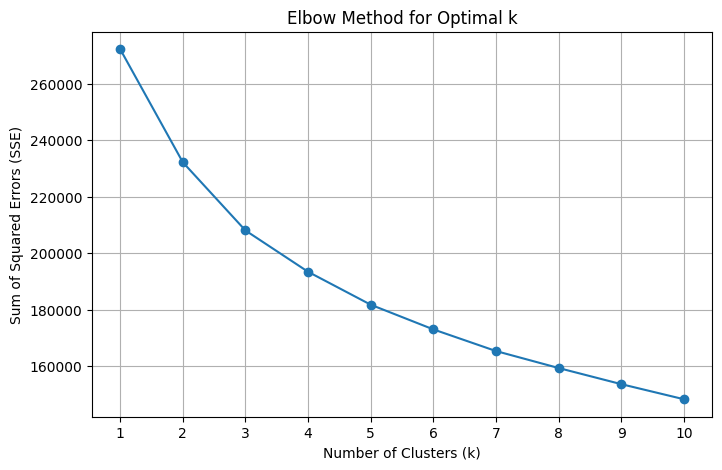

Silhouette Score for k=2: 0.208
Silhouette Score for k=3: 0.136
Silhouette Score for k=4: 0.120
Silhouette Score for k=5: 0.119


In [ ]:

# Create an empty list to store the sum of squared errors
sse = []

# Loop through a range of possible cluster numbers for the elbow method
k_range = range(1, 11)
for k in k_range:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    # Fit the model to the processed data
    kmeans.fit(df_clustering_processed)
    # Append the inertia (SSE) to the list
    sse.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Calculate and print silhouette scores for a few selected numbers of clusters
silhouette_scores = []
k_silhouette_range = range(2, 6) # Calculate for k=2 to 5
for k in k_silhouette_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(df_clustering_processed)
    score = silhouette_score(df_clustering_processed, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")


## Apply clustering algorithm(s)###
Apply the K-Means clustering algorithm to the preprocessed data using the optimal number of clusters determined in the previous step.


In [ ]:
# Step 1: Instantiate a KMeans object with the chosen optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Step 2: Fit the KMeans model to the preprocessed clustering data
kmeans.fit(df_clustering_processed)

# Step 3: Add the resulting cluster labels to the original df DataFrame
df['ClusterLabel'] = kmeans.labels_

# Display the first few rows of the original DataFrame with the new cluster labels
print("First 5 rows of the original DataFrame with Cluster Labels:")
display(df.head())

First 5 rows of the original DataFrame with Cluster Labels:


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,ClusterLabel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,1
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,1
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,2
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,0
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,1


## Visualize clusters###
Visualize the clusters using dimensionality reduction techniques like PCA to reduce the processed clustering data to 2 dimensions and then create a scatter plot colored by cluster labels.


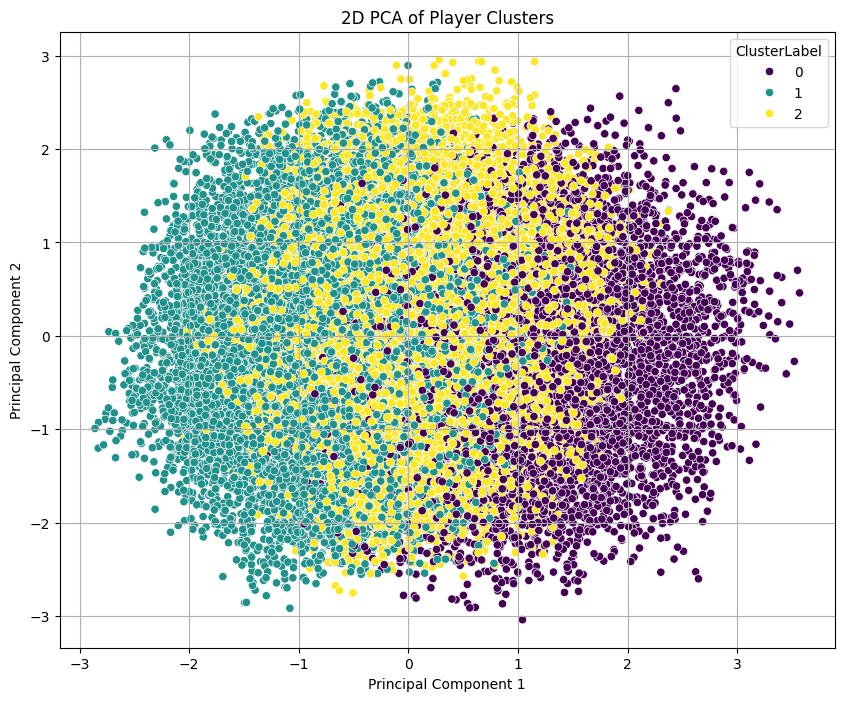

In [ ]:
# Step 1 & 2: Import PCA and instantiate a PCA object for 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)

# Step 3: Fit and transform the df_clustering_processed data
pca_components = pca.fit_transform(df_clustering_processed)

# Step 4: Create a new DataFrame with the 2D PCA results and the 'ClusterLabel'
pca_df = pd.DataFrame(data = pca_components, columns = ['principal component 1', 'principal component 2'])
pca_df['ClusterLabel'] = df['ClusterLabel']

# Step 5 Create and display the scatter plot colored by cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='ClusterLabel', data=pca_df, palette='viridis', legend='full')
plt.title('2D PCA of Player Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# 1. Group by 'ClusterLabel' and calculate mean for numerical features
numerical_cluster_summary = df.groupby('ClusterLabel')[['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'InGamePurchases', 'PlayerLevel', 'AchievementsUnlocked', 'Age']].mean()
print("=== Numerical Feature Means by Cluster ===")
display(numerical_cluster_summary)

# 2. Analyze distribution of categorical features by cluster
print("\n=== Categorical Feature Distribution by Cluster ===")
for col in ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']:
    print(f"\n--- {col} Distribution ---")
    # Calculate value counts for each cluster and normalize to get proportions
    categorical_distribution = df.groupby('ClusterLabel')[col].value_counts(normalize=True).unstack(fill_value=0)
    display(categorical_distribution)


=== Numerical Feature Means by Cluster ===


,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,InGamePurchases,PlayerLevel,AchievementsUnlocked,Age
ClusterLabel,,,,,,,
0,11.940694,9.530780,94.493222,1.0,50.027609,24.529287,31.988807
1,12.076099,4.509390,94.984433,0.0,49.484680,24.513714,31.990919
2,12.013948,14.524391,94.747548,0.0,49.641316,24.538121,31.996077



=== Categorical Feature Distribution by Cluster ===

--- Gender Distribution ---


Gender,Female,Male
ClusterLabel,,
0,0.395473,0.604527
1,0.397702,0.602298
2,0.408542,0.591458



--- Location Distribution ---


Location,Asia,Europe,Other,USA
ClusterLabel,,,,
0,0.206442,0.303818,0.094516,0.395224
1,0.201260,0.299543,0.099889,0.399308
2,0.201012,0.298134,0.098576,0.402278



--- GameGenre Distribution ---


GameGenre,Action,RPG,Simulation,Sports,Strategy
ClusterLabel,,,,,
0,0.193135,0.195996,0.200224,0.201716,0.208929
1,0.201446,0.202681,0.199469,0.200272,0.196133
2,0.204049,0.195824,0.198924,0.201455,0.199747



--- GameDifficulty Distribution ---


GameDifficulty,Easy,Hard,Medium
ClusterLabel,,,
0,0.496829,0.199105,0.304067
1,0.498888,0.202372,0.298740
2,0.502626,0.198102,0.299272



--- EngagementLevel Distribution ---


EngagementLevel,High,Low,Medium
ClusterLabel,,,
0,0.265390,0.253327,0.481283
1,0.049790,0.427786,0.522424
2,0.467953,0.086175,0.445872


## Analyze cluster characteristics

### Subtask:
Explore the distribution of features within each cluster to understand the typical behavior of players in that segment.


In [ ]:
# Analyze the numerical feature means
print("\n--- Analysis of Numerical Feature Means ---")
print("Cluster 0 (Spenders / Engaged Purchasers): Average engagement, but highest average InGamePurchases.")
print("Cluster 1 (Casual / Low Engagement Players): Lowest engagement metrics (PlayTimeHours, SessionsPerWeek, AvgSessionDurationMinutes, PlayerLevel, AchievementsUnlocked, InGamePurchases).")
print("Cluster 2 (Highly Engaged / Dedicated Players): Highest engagement metrics (PlayTimeHours, SessionsPerWeek, AvgSessionDurationMinutes, PlayerLevel, AchievementsUnlocked) but low InGamePurchases.")

# Analyze the categorical feature distributions, focusing on EngagementLevel and GameGenre
print("\n--- Analysis of Categorical Feature Distributions ---")
print("Gender, Location, and GameDifficulty distributions are relatively similar across clusters.")
print("EngagementLevel distribution shows clear differences:")
print(" - Cluster 0: Higher proportion of 'High' and 'Medium' engagement compared to Cluster 1, aligned with 'Spenders' label.")
print(" - Cluster 1: Highest proportion of 'Low' and 'Medium' engagement, reinforcing 'Casual' label.")
print(" - Cluster 2: Highest proportion of 'High' engagement, supporting 'Highly Engaged' label.")

# Based on the detailed analysis, refine the cluster labels
# Cluster 0: Spenders / Engaged Players (They spend money despite not being the most highly engaged in terms of time/sessions)
# Cluster 1: Casual / Low Engagement Players (Low across all engagement metrics and purchases)
# Cluster 2: Highly Engaged / Non-Spending Players (High engagement metrics, but low purchases)

print("\n--- Refined Cluster Labels ---")
print("Cluster 0: Spenders / Engaged Players")
print("Cluster 1: Casual / Low Engagement Players")
print("Cluster 2: Highly Engaged / Non-Spending Players")

# The subtask is complete. The analysis and refined labels are printed.


--- Analysis of Numerical Feature Means ---
Cluster 0 (Spenders / Engaged Purchasers): Average engagement, but highest average InGamePurchases.
Cluster 1 (Casual / Low Engagement Players): Lowest engagement metrics (PlayTimeHours, SessionsPerWeek, AvgSessionDurationMinutes, PlayerLevel, AchievementsUnlocked, InGamePurchases).
Cluster 2 (Highly Engaged / Dedicated Players): Highest engagement metrics (PlayTimeHours, SessionsPerWeek, AvgSessionDurationMinutes, PlayerLevel, AchievementsUnlocked) but low InGamePurchases.

--- Analysis of Categorical Feature Distributions ---
Gender, Location, and GameDifficulty distributions are relatively similar across clusters.
EngagementLevel distribution shows clear differences:
 - Cluster 0: Higher proportion of 'High' and 'Medium' engagement compared to Cluster 1, aligned with 'Spenders' label.
 - Cluster 1: Highest proportion of 'Low' and 'Medium' engagement, reinforcing 'Casual' label.
 - Cluster 2: Highest proportion of 'High' engagement, suppor

### **Thank You**